<a href="https://colab.research.google.com/github/Zinni98/Symnet-Unsupervised-domain-adaptation/blob/main/SymNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Conventions and notes:_

- _Some small sentences of the paper are copied exactly in this document. This is done in parts when we felt that there were no reason to rewrite, better explain or summarise the concept because it was already clear and concise for us._

- _For better coherence we decided to stick with the notatation used in the paper in writing formulas._

- _Wherever code is not commented, it is because we thought that it was something trivial._

- _Somewhere you can find no markdown preceeding a code cell, this is because the included code lines were either discussed in class or a similar chunk of code was already explained earlier or a docstring was more suitable for the context._

- _If there is any problem in the visualization of images, here is the link to the github repository, where images should be displayed correctly: [Symnet github](https://github.com/Zinni98/Symnet-Unsupervised-domain-adaptation)._

# Unsupervised Domain Adaptation
## 1. Introduction
The **goal** of this project is to **build a deep learning framework for** Unsupervised Domain Adaptation (**UDA**).
**Domain Adaptation** is a subdiscipline of machine learning which deals with scenarios where a **model is trained supervisedly on** data coming from a known distribution (*source* domain) **but** during the **test** phase, data are sampled from **another unknown distribution** (*target* domain). This of course can impact the performance singnificantly.
The *underlying concept* of DA is *closely related to transfer learning* which refers to a class of ML problems that *deals with different tasks or domains*. 
Furthermore, it is possible to use the target data without labels (that's why "unsupervised") in order to improve the performance of the model.

## 2. Objective
The **aim** of this project is to **use** an **Unsupervised Domain Adpatation technique of choice** in order **to improve** performances with respect to a **baseline**. The latter is obtained by training on the source domain and testing on the target domain without deploying any specific technique to take the domain shift into account.

### 2.1 UDA Method
The **method chosen** for Unsepervised Domain Adaptation is [**Symnet**](https://arxiv.org/pdf/1904.04663.pdf) (explained later in more details) which belongs to the **domain adversarial family** of methods for domain adaptation. The main idea is to **use a two-level domain confusion scheme** in order to let the intermediate network learn features that are **invariant to the corresponding category in both domains**.

### 2.2 Problem setting
In this problem we are required to perform an **object recognition task**: given an image, the model should be able to produce the label, hopefully correct, associated with that image.

### 2.2.1 Datasets
The chosen **dataset** is [**Adaptiope**](https://openaccess.thecvf.com/content/WACV2021/papers/Ringwald_Adaptiope_A_Modern_Benchmark_for_Unsupervised_Domain_Adaptation_WACV_2021_paper.pdf) which has images coming from **3 domains and 123 classes**.
We are going to **use** a subset of this consisting on **2 domains with 20 classes**. The two domains are:

- **Real world**

- **Product images**

As simplifying assumption the **20 classes are the same across the two domains**.

From now on we will treat the data coming from the two domains as two separate datasets: the **source dataset $X^S$** and the **target dataset $X^T$**.
Both $X^S$ and $X^T$ use a 80%/20% split for the training and test set respectively.

*Note : Here we refer to Source and Target instead of Real World and Product because the domain adaptation procedure is applied both ways, i.e. first the real world domain dataset is considered as training set and the target domain dataset as test set. Consequently, the reverse has been addressed as well.*

[comment]: <> (
_Note: Here we refer to Source and Target instead of Real World and Product, because during training we are going evaluate our model first by considering real world domain as source and product as target, and then the opposite._
)

### 2.2.2 Methodology
To evaluate performances of the proposed domain adaptation technique, we need to define a *baseline score* which we want *to improve* on. The baseline score is obtained by firstly training on the source training set, and then evaluating on the target training set.

| ![Baseline](https://drive.google.com/uc?id=15EdVkmyHUD_sXPuPDE2P0XB5jk-dn9t0) |
|:--:|
| *The image shows a sketch with the highlighted parts used to train and test the baseline* |

It can be *useful* also *to define an upper bound* to the performance, obtained by *training on the target training set* and *testing on the target test set*.

| ![Baseline](https://drive.google.com/uc?id=1Y-jM7yED_ssufwL-hAGNTlbr_KntTCSZ) |
|:--:|
| *The image shows a sketch with the highlighted parts used to train and test the upper bound* |

Finally, for **Unsupervised Domain Adaptation the training is performed supervisedly on the source training set**, **unsupervisedly on the target training set** and then **tested on the target test set**.

| ![Baseline](https://drive.google.com/uc?id=17Wmg7Yd7RltaOBAkA5DEksTp4HUTJvrT) |
|:--:|
| *The image shows a sketch with the highlighted parts used to train and test the UDA technique* |

We **expect** that the **proposed** Domain Adaptation **technique will perform better than the baseline** but worse than the upper bound and of course, the more close is to the upper bound, the better.

Performance are measured in terms of **validation accuracy**: 
$$\text{Accuracy} = \dfrac{TP+TN}{TP+TN+FP+FN}$$

In this project we are required to test the proposed Unsupervised Domain Adaptation technique first by considering the "Product" domain as the source domain and the "Real World" domain as the target domain and then to the other way around: "Real World" as source and "Product" as target.
So we need to compute baseline, upper bound and UDA performances first in one direction (i.e. Product $\rightarrow$ Real World) and then in the other direction (i.e. Real World $\rightarrow$ Product)




### Requirements, imports and hyperparemters

In [1]:
# used to display automatically execution times of each cell
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.0 MB/s eta 0:00:00
time: 510 µs (started: 2023-01-07 11:55:56 +00:00)


In [2]:
## Google Drive
from google.colab import drive

## For abstract classes
from abc import ABC, abstractmethod

## Progress bar
from tqdm import tqdm

## PyTorch
import torch
import torch.optim as optim
from torch.utils.data import Subset
import torch.nn as nn
from torch.utils.data import DataLoader

## TorchVision
import torchvision
import torchvision.transforms as T
from torchvision.datasets import ImageFolder

## Scikit-learn
from sklearn.model_selection import train_test_split

## Matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

## For typing vars
from typing import Tuple, List

## Garbage collector
import gc

## To pass functions as function parameters
from functools import partial

## Support modules
import scipy.stats as stat
import math
import numpy as np

time: 4.02 s (started: 2023-01-07 11:55:56 +00:00)


In [3]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/
time: 20.9 s (started: 2023-01-07 11:56:00 +00:00)


In [4]:
classes = ['backpack', 'bookcase', 'car jack', 'comb', 'crown', 'file cabinet', 
           'flat iron', 'game controller', 'glasses', 'helicopter', 'ice skates', 
           'letter tray', 'monitor', 'mug', 'network switch', 
           'over-ear headphones', 'pen', 'purse', 'stand mixer', 'stroller']

cuda = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 128
num_classes = len(classes)
# Put here the directory of the dataset if this is not the same as yours
rootdir = 'gdrive/My Drive/Colab Notebooks/data/adaptiope_small'

time: 648 ms (started: 2023-01-07 11:56:21 +00:00)


## 3. Data Extraction
In `get_data(batch_size, root_dir)` the following steps are performed :
- images *transforms are defined*. In particular, the adopted transformation sequence has been found there: [ResNet Transforms](https://pytorch.org/hub/pytorch_vision_resnet/);
- *images* from the local drive are *loaded and the transforms applied*;
- data *splitting*;
- *collecting individual fetched data samples into batches*.
The returned objects are the real world and product domain data loaders.

In [5]:
def get_data(batch_size: int, 
             root_dir: str, 
             random_state = 42, 
             test_split = 0.2
             ) -> Tuple[torch.utils.data.DataLoader]:

  """ Read, transform, split and batches dataset

  Parameters :
  ------------

  batch_size: int
    batch size for the dataloader

  root_dir: str
    Directory of adaptiope_small (e.g. "path/to/adaptiope_small")
  
  random_state : int
    default: 42
    seed used in "train_test_split" function to split dataset into training and 
    test

  test_split: float
    default : 0.2 (20%)
    test set size wrt the original dataset. 

  Returns :
  ------------
    product_train_loader: torch.utils.data.DataLoader
        dataloader corresponding to training set for product domain

    product_test_loader: torch.utils.data.DataLoader 
        dataloader corresponding to test set for product domain

    rw_train_loader: torch.utils.data.DataLoader 
        dataloader corresponding to training set for real world domain

    rw_test_loader: torch.utils.data.DataLoader
        dataloader corresponding to test set for real world domain

  """

  # Transforms for resnet found there https://pytorch.org/hub/pytorch_vision_resnet/
  transform_img = list()
  transform_img.append(T.Resize(256))
  transform_img.append(T.CenterCrop(224))
  transform_img.append(T.ToTensor())
  transform_img.append(T.Normalize(mean=[0.485, 0.456, 0.406], 
                                   std=[0.229, 0.224, 0.225]))
  transform_img = T.Compose(transform_img)

  # load data
  product_images_dataset = ImageFolder(root = f"{root_dir}/product_images/", 
                                       transform = transform_img)
  
  rw_images_dataset = ImageFolder(root = f"{root_dir}/real_life/", 
                                  transform = transform_img)

  product_train_indexes, product_test_indexes = train_test_split(list(range(len(product_images_dataset.targets))),
                                                test_size = test_split, 
                                                stratify = product_images_dataset.targets, 
                                                random_state = random_state)
  
  rw_train_indexes, rw_test_indexes = train_test_split(list(range(len(rw_images_dataset.targets))),
                                                test_size = test_split, 
                                                stratify = rw_images_dataset.targets, 
                                                random_state = random_state)
  

  product_train_data = Subset(product_images_dataset, product_train_indexes)
  product_test_data = Subset(product_images_dataset, product_test_indexes)

  rw_train_data = Subset(rw_images_dataset, rw_train_indexes)
  rw_test_data = Subset(rw_images_dataset, rw_test_indexes)

  product_train_loader = DataLoader(product_train_data, batch_size, shuffle = False)
  product_test_loader = DataLoader(product_test_data, batch_size, shuffle = False)

  rw_train_loader = DataLoader(rw_train_data, batch_size, shuffle = False)
  rw_test_loader = DataLoader(rw_test_data, batch_size, shuffle = False)

  return product_train_loader, product_test_loader, rw_train_loader, rw_test_loader

time: 2.73 ms (started: 2023-01-07 11:56:21 +00:00)


## 4. Baseline
### 4.1 Network initialization
The **ResNet34 pretrained model is intialized**. Since for the **baseline** we decided to perform a **simple fine-tune**, the original classifier layer has been overwritten and the gradients has been enabled.

In [6]:
def initialize_resnet34(num_classes: int):
  """ ResNet-34 initialization

  Parameters :
  ------------
    num_classes: int
        number of categories the net needs to output
  
  Returns :
  ------------
    model :
        ResNet-34 with pretrained weights, gradients enabled and a brand new 
        classifier layer
        
  """

  model = torchvision.models.resnet34(weights='ResNet34_Weights.DEFAULT')

  in_features = model.fc.in_features

  model.fc = nn.Linear(512, num_classes)
  for param in model.fc.parameters():
    param.requires_grad = True

  return model

time: 893 µs (started: 2023-01-07 11:56:21 +00:00)


### 4.2 Cross-entropy loss for training data


In [7]:
def get_ce_cost_function() -> torch.nn.CrossEntropyLoss:
  """ Cross entropy loss object
  
  Parameters :
  -------------
    None

  Returns :
  ------------
    cost_function : torch.nn.CrossEntropyLoss
        CE loss object

  """

  cost_function = torch.nn.CrossEntropyLoss()

  return cost_function

time: 563 µs (started: 2023-01-07 11:56:21 +00:00)


### 4.3 Defining the optimizer
We have written the abstract class `AnnealingOptimizer` in order to define an optimizer that updates the learning rate using the annealing strategy proposed in the [Symnet paper](https://arxiv.org/pdf/1904.04663.pdf).

The strategy used is the following:
$$\eta = \frac{\eta_0}{(1+\alpha p)^\beta}$$
where:

- $\eta_0$ is the **base learning rate**, which by default is $0.001$. Note that it has been *changed with respect to the one proposed in the paper*, because we noticed that it was too high ;

- $p$ is the progress in training: $\text{p} = \frac{\text{epoch}}{\text{total epochs}}$. Notice that when the function `update_lr()` is called, the value of $p$ gets updated ;

- $\alpha = 10$ is a constant ;
- $\beta = 0.75$ is a constant ;

Than the **class `ResNetOptimizer`** inherits from the `AnnealingOptimizer` and just **defines the optimizer** to be used. This optimizer will be used for **ResNet34**, which is the network of choice, either for the baseline, the upper bound and the deployed UDA technique.

<br>

We decided to use the **annealing optimizer** also **for** the **baseline and the upper bound**, in order **to compare it better with** [Symnet](https://arxiv.org/pdf/1904.04663.pdf).




In [8]:
class AnnealingOptimizer(torch.optim.Optimizer, ABC):
  """
  Abstract class to implement a SGD optimizer using an annealing strategy
  """
  def __init__(self, model, nr_epochs, lr: float = 0.001, epoch: int = 0) -> None:
    if not 0.0 <= lr:
      raise ValueError(f"Invalid learning rate: {lr}")
    if not 0 <= epoch:
      raise ValueError(f"Invalid epoch value: {epoch}")
    
    self.nr_epochs = nr_epochs
    self.epoch = epoch
    self._alpha = 10
    self._beta = 0.75
    self._base_lr = lr

  def update_lr(self):
    """
    Updates the learning rate using the annealing strategy.
    In order to let the annealing strategy to work correctly, this method should be called at every epoch during the network training

    The learning rate for the classifier is 10 times bigger as proposed in the [Symnet paper](https://arxiv.org/pdf/1904.04663.pdf)
    """
    self.epoch += 1
    new_lr = self._compute_lr()
    for g in self.optimizer.param_groups:
      if g["name"] == "fe":
        g["lr"] = new_lr
      else:
        g["lr"] = new_lr*10

    
  def _compute_lr(self):
    """
    Computes the learning rate using the proposed annealing strategy

    Returns :
    ------------
      self._base_lr * etapfloat : float
        Updated learning rate
    """
    etap = 1 / ((1 + self._alpha * self.epoch / self.nr_epochs ) ** self._beta)
    return self._base_lr * etap

  def step(self):
    self.optimizer.step()
  
  def zero_grad(self):
    self.optimizer.zero_grad()
  

class ResNetOptimizer(AnnealingOptimizer):
  """
  Implements an annealing optimizer for Resnet
  """
  def __init__(self, model, nr_epochs, lr: float = 0.001, epoch: int = 0, momentum: float = 0.9) -> None:
    super(ResNetOptimizer ,self).__init__(model, nr_epochs, lr, epoch)
    
    # Note that names for parameters group are important in order to update each group differently
    self.optimizer = optim.SGD([
                {'params': self.__get_fe_params(model), "name": "fe"},
                {'params': model.fc.parameters(), "lr": self._compute_lr()*10, "name": "classifier"}
            ], lr=lr, momentum=momentum)
    

  def __get_fe_params(self, model):
    """ Takes parameters of the Resnet's feature extractor
    Parameters : 
    ------------
        model : 
            network (ResNet-34) to extract feature extractor parameters
    """
    fe_layers = list(model.children())[:-1]
    all_parameters = [param for layer in fe_layers for param in layer.parameters()]
    for param in all_parameters:
      yield param

time: 4.89 ms (started: 2023-01-07 11:56:21 +00:00)


#### 4.3.1 Gradients visualization
The following function has been used to address whether the optimizer was able to efficiently update the network's weights.

In [9]:
def plot_grad_flow(named_parameters: List[str]) -> None:
    '''Plots the gradients flowing through different layers in the net during training.
    
    Can be used for checking for possible gradient vanishing / exploding problems.
    
    Usage: Plug this function in training loop after loss.backwards() to visualize the gradient flow
    
    Parameters : 
    ------------
        named_parameters : list(str)
            model.named_parameters() : list of named parameters in the model
    
    Return : 
    ------------
        None
    '''

    ave_grads = []
    max_grads= []
    layers = []
    for n, p in named_parameters:
      if(p.requires_grad) and ("bias" not in n):
        layers.append(n)
        ave_grads.append(p.grad.abs().mean().cpu())                         # moving data to CPU to accomodate plt
        max_grads.append(p.grad.abs().max().cpu())
    plt.bar(np.arange(len(max_grads)), max_grads, alpha=0.1, lw=1, color="c")
    plt.bar(np.arange(len(max_grads)), ave_grads, alpha=0.1, lw=1, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, lw=2, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(left=0, right=len(ave_grads))
    plt.ylim(bottom = -0.001, top=0.02) # zoom in on the lower gradient regions
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    plt.legend([Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="b", lw=4),
                Line2D([0], [0], color="k", lw=4)], 
               ['max-gradient', 'mean-gradient', 'zero-gradient'],
                loc='best')

time: 3.13 ms (started: 2023-01-07 11:56:21 +00:00)


### 4.4 Training procedure
Briefly :
- the **net** is set into **train mode**.

- The **training dataset is iteratively cycled** through on groups of `batch_size` dimension. 

- **For each sample** in the current batch, **inputs and targets** are **moved** to the specified **device**, the predicted outputs and the losses computed.

- After that, an **optimization step** is performed **to update the weights**.

- Finally, **accuracy and cumulative loss are computed**.

In [10]:
def training_step(net, 
                  data_loader: torch.utils.data.DataLoader, 
                  optimizer, #: torch.optim.optimizer.Optimizer,
                  cost_function ,#: torch.nn.modules._Loss, 
                  device: str = cuda, 
                  grad_flow:bool = True
                  ) -> Tuple[float, float]:

  """ Performs the training of the network for one epoch.

  Parameters :
  ------------

  net :
    network model
  
  data_loader: torch.utils.data.DataLoader
    Data loader intialized with the training set.
  
  optimizer: torch.optim.optimizer.Optimizer
    Optimizer of choice

  cost_function: torch.nn.modules._Loss
    Loss function to be used

  device: str
    default : global variable "cuda"
    Device in which computations should be performed.
    Admitted values:
        - "cpu"
        - "cuda:n" -> where n is the gpu number in case of multiple gpu configurations
  
  grad_flow : bool
    default : True
    Whether to plot the gradient update visualization 
  
  Returns :
  ------------

  cumulative_loss/samples : float 
    Cumulative loss for the whole training set
  
  (cumulative_accuracy/samples)*100 : float
    Cumulative accuracy for the whole training set

  """

  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.
  
  net.train() 
 
  # iterate over the training set
  with tqdm(data_loader, unit="batch") as tepoch: 
    for batch_idx, (inputs, targets) in enumerate(tepoch):
        net.zero_grad()
        tepoch.set_description(f"# Batch for training step : {batch_idx}")
        # load data into GPU
        inputs = inputs.to(device)
        targets = targets.to(device)

        # forward pass
        outputs = net(inputs)

        # loss computation
        loss = cost_function(outputs,targets)

        # backward pass
        loss.backward()
        if grad_flow:
            plot_grad_flow(net.named_parameters())

        # parameters update
        optimizer.step()

        # gradients reset
        optimizer.zero_grad()

        # fetch prediction and loss value
        samples += inputs.shape[0]
        cumulative_loss += loss.item()
        _, predicted = outputs.max(dim=1) # max() returns (maximum_value, index_of_maximum_value)

        # compute training accuracy
        cumulative_accuracy += predicted.eq(targets).sum().item()
        tepoch.set_postfix(loss=loss.item(), 
                            accuracy=100.*(cumulative_accuracy/samples))

  return cumulative_loss/samples, (cumulative_accuracy/samples)*100

time: 2.35 ms (started: 2023-01-07 11:56:21 +00:00)


### 4.5 Test procedure
- The **network** is set to **evaluation mode**. 

- After this, we **disable all the gradients** to avoid keeping track of the gradients (not needed for testing). The tesiting procedure from now on is pretty much analogous to what's been done during the training with the only difference that the **weights of the network don't get updated**.

In [11]:
def test_step(net, 
              data_loader, #: torch.utils.data.DataLoader, 
              cost_function, #: torch.nn.modules._Loss, 
              device:str = cuda
              ) -> Tuple[float, float]:
              
  """ Test the network for one epoch

  Parameters :
  ------------
  net :
    network model

  data_loader: torch.utils.data.DataLoader
    Data loader intialized with the test set

  cost_function: torch.nn.modules._Loss
    Loss function to be used

  device: str
    default : global variable "cuda"
    Device in which computations should be performed.
    Admitted values:
        - "cpu"
        - "cuda:n" -> where n is the gpu number in case of multiple gpu configurations
  
  Returns :
  ------------

  cumulative_loss/samples : float 
    Cumulative loss for the whole test set
  
  (cumulative_accuracy/samples)*100 : float
    Cumulative accuracy for the whole test set

  """

  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.

  # set the network to evaluation mode
  net.eval() 

  # disable gradient computation (we are only testing, we do not want our model to be modified in this step!)
  with torch.no_grad():
    with tqdm(data_loader, unit="batch") as tepoch:
        # iterate over the test set
        for batch_idx, (inputs, targets) in enumerate(tepoch):
            tepoch.set_description(f"# Batch for test step: {batch_idx}")
            # load data into GPU
            inputs = inputs.to(device)
            targets = targets.to(device)
    
            # forward pass
            outputs = net(inputs)
    
            # loss computation
            loss = cost_function(outputs, targets)
    
            # fetch prediction and loss value
            samples+=inputs.shape[0]
            cumulative_loss += loss.item() # Note: the .item() is needed to extract scalars from tensors
            _, predicted = outputs.max(1)
    
            # compute accuracy
            cumulative_accuracy += predicted.eq(targets).sum().item()
            tepoch.set_postfix(loss=loss.item(), 
                                  accuracy=100.*(cumulative_accuracy/samples))

  return cumulative_loss/samples, cumulative_accuracy/samples*100

time: 5.09 ms (started: 2023-01-07 11:56:21 +00:00)


### 4.6 Plot results


In [12]:
def plot_results(train_losses: List[float],
                 train_accs: List[float],  
                 epochs: List[int],
                 train_losses2: List[float]=None
                 ) -> None:
    """ Plot trends of accuracy and loss after training procedure

    Parmaters :
    ------------

      train_losses : list(floats)
        all the losses computed at each epoch after one training step

      train_accs : list(floats)
        all accuracies at each epoch achieved at each training step

      epochs : list(int)
        list containing the number of epochs to display along x axis 
        in the plots

      train_losses2 : list(float)
        default : None
        provided for the UDA case where two losses are displayed. If None
        the trend is not displayed

    Returns:
    ------------
        None

    """                 

    plt.figure(num=3, figsize=(10, 5)).patch.set_facecolor('white')
    plt.title('Train Loss trend')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.plot(train_losses, label='CLF Train loss')

    if train_losses2 != None:
      plt.plot(epochs, train_losses2, label='FE Train loss')

    plt.legend()
    plt.show()

    plt.figure(num=3, figsize=(10, 5)).patch.set_facecolor('white')
    plt.title('Train Accuracy trend')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.plot(epochs, train_accs, label='Train accuracy')
    plt.legend()
    plt.show()

time: 4.21 ms (started: 2023-01-07 11:56:22 +00:00)


### 4.7 Main Function
This function is meant to be a '**wrapper**' **function** where every aforecited function is called when needed.  
First, the **parameters values are defined as arguments** of the function.  
Then, sequentially :     
- extract, **process** and load **data**;
- network, optimizer and cost function are **initialized**;
- **iterating** a certain number of times equal to a **fixed number of epochs**. In here the following steps are performed :    
  - **computation of training loss and accuracy**;
  - **computation of test loss and accuracy**;
  - informing the writer of the values obtained.

- At the **end of the training**, the **network** is **tested on** both test sets of **source and tagret** domains.

Here the network is trained on product images and then tested on real world ones.

In [13]:
def main(train_loader: torch.utils.data.DataLoader,
         test_loader: torch.utils.data.DataLoader,
         device: str= cuda,
         epochs: int = 15,
         nr_classes: int = num_classes, 
         img_root: str = rootdir,
         trends: bool=True, 
         grad_flow: bool=True
         ) -> float:

  """ Wrapper function to run the whole pipeline
  Parameters :
  ------------

  train_loader : torch.utils.data.DataLoader
    dataloader used as training set
  
  test_loader : torch.utils.data.DataLoader
    dataloader used as test set

  device : str
    deafult: global variable "cuda"
    The device on which the computation takes place.
    Admitted values:
        - "cpu"
        - "cuda:n" -> where n is the gpu number in case of multiple gpu configurations

  epochs : int
    default = 15
    Number of training epochs

  nr_classes : int
    default : global variable "num_classes"
    Number of classes for the classification task
  
  img_root : str
    default : global constant "rootdir"
    Root where the dataset is stored
  
  trends : bool
    default : True
    Whether to print the training accuracy and loss trends

  grad_flow : bool
    default : True
    Whether to plot the gradient update visualization

  Returns :
  ------------
    test_accuracy: float
        average accuracy achieved on the test set
  """
  
  net = initialize_resnet34(nr_classes).to(device)
  print('Network Init Done')
  optimizer = ResNetOptimizer(net, epochs)
  print('Got Optimizer')
  cost_function = get_ce_cost_function()
  print('Got Cost Function')

  train_losses = []
  train_accs = []
  sampled_epochs = []

  for e in range(epochs):
    print(f"Epoch {e}:")
    train_loss, train_accuracy = training_step(net=net, 
                                               data_loader=train_loader, 
                                               optimizer=optimizer, 
                                               cost_function=cost_function, 
                                               device=device, 
                                               grad_flow=grad_flow)

    train_losses.append(train_loss)
    train_accs.append(train_accuracy)
    sampled_epochs.append(e)

    # Need to apply the annealing strategy
    optimizer.update_lr()
  
  # perform final test step and print the final metrics
  print("Performing test step ...")
  _, test_accuracy = test_step(net, test_loader, cost_function, device)
  
  if(trends):
    print("============================ Trends ============================")
    plot_results(train_losses=train_losses, 
                 train_accs=train_accs, 
                 epochs=sampled_epochs)
  
  return test_accuracy

time: 2.15 ms (started: 2023-01-07 11:56:22 +00:00)


## 5. Domain Adaptation Technique : SymNet
The **design** of the **proposed symmetric network** is characterized by:

- The **Feature extractor G**. We decided to use the *feature extractor defined by ResNet34* (i.e. Resnet34 without the last fully connected layer) to make the comparison with the baseline and upper bound results much fair as possible ;

[comment]: <> (in order to allow the comparison with the results obtained with the baseline and the upper bound)

- **Two parallel task classifiers** $C_s$ and $C_t$ are both based on a single fully connected layer (as proposed in the paper) and they contain **$20$ neurons each**, as the number of categories for the proposed problem (When we will explain the losses used for Symnet, we are going to use $K$ to denote the number of classes in order to be more generic). 
Composing the two classifiers, we get the $C_{st}$ classifer that presents a total of $40$ units, e.g. the union of the two FC layers.

| ![symnet](https://drive.google.com/uc?id=1qyPClxz8zcJvhVGF84-IKv1Owljt0h7H) |
|:--:|
| *The image shows a sketch of the network architecture, including the error functions which will be explained later on.* |

<br>

As it is possible to notice, the **architecture** results to be **pretty simple**. 
Indeed, the **core reasoning** has been developped on **losses definitions level**.

In [14]:
class SymNet(nn.Module):
  """
  Class representing the proposed symmetric network
  """
  def __init__(self, n_classes: int = 20) -> None:
    super(SymNet, self).__init__()
    resnet = initialize_resnet34(20)
    # Taking the feature extractor of resnet34
    # Reference: https://stackoverflow.com/questions/55083642/extract-features-from-last-hidden-layer-pytorch-resnet18
    self.feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])
    self.source_classifier = nn.Linear(in_features=512, out_features=n_classes)
    self.target_classifier = nn.Linear(in_features=512, out_features=n_classes)
  

  def forward(self, x: torch.Tensor) -> tuple:
    """ Performs the forward pass

    Parameters :
    ------------
    x : torch.Tensor
      Input tensor to the network
    
    Returns :
    ------------

    source_output: torch.Tensor
        source classifier predicitons

    target_output: torch.Tensor
        target classifier predicitons

    source_target_classifier: torch.Tensor
        concatenation of the previous two

    """

    features = self.feature_extractor(x)
    features = features.squeeze()
    source_output = self.source_classifier(features)
    target_output = self.target_classifier(features)

    source_target_classifier = torch.cat((source_output, target_output), dim=1)
    
    return source_output , target_output, source_target_classifier
  

  def parameters(self) -> torch.Tensor:
    """ Paramters of the netowork

    Yields :
    ------------
        param :torch.Tensor
            Network parameters

    """

    fe = list(self.feature_extractor.parameters())
    sc = list(self.source_classifier.parameters())
    tc = list(self.target_classifier.parameters())
    tot = fe + sc + tc
    for param in tot:
      yield param
    
  def classifier_parameters(self) -> torch.Tensor:
    """ Parameters of the classification layer

    Yields :
    ------------
        param : torch.Tensor
            Classification layer parameters

    """

    sc = list(self.source_classifier.parameters())
    tc = list(self.target_classifier.parameters())
    tot = sc + tc
    for param in tot:
      yield param

  def feature_extractor_parameters(self) -> torch.Tensor:
    """ Parameters of the feature extractor

    Yields :
    ------------
    self.feature_extractor.parameters(): torch.Tensor
        Feature extractor parameter
        
    """
    return self.feature_extractor.parameters()


time: 11 ms (started: 2023-01-07 11:56:22 +00:00)


### 5.1 Optimizer for symnet
Symnet uses the **AnnealingOptimizer strategy** in order **to adjust the learning rate during epochs** as proposed in the paper.

[comment]: <> (It just defines the optimizer with the right parameters.)

Additionaly, again following the paper, the **learning rate for** the combined classifier (e.g. **$C_{st}$**) is set **$10$ times bigger than the feature extractor one**.

In [15]:
class SymNetOptimizer(AnnealingOptimizer):
  """ Implements an annealing optimizer for SymNet """
  
  def __init__(self, model, nr_epochs, lr: float = 0.001, epoch: int = 0):
    super(SymNetOptimizer ,self).__init__(model, nr_epochs, lr, epoch)

    # Note that names for parameters group are important in order to update each group differently
    self.optimizer = optim.SGD([
                {'params': model.feature_extractor_parameters(), "name": "fe"},
                {'params': model.classifier_parameters(), "lr": self._compute_lr()*10, "name": "classifier"}
            ], lr=lr, momentum=0.9)

time: 1.55 ms (started: 2023-01-07 11:56:22 +00:00)


### 5.2 Notation used
In order to define the losses, we explicit here the notation used in the following formulas:

- The classifiers are denoted as: **$C^s$** for the **source classifier**, **$C^t$** for the **target classifier** and **$C^{st}$** for the **combined classifier** (source + target) ;

- **$K$** is the **ouput dimension** of each classifier (source and target), which corresponds to the number of categories in both domains. Since in UDA the number of classes in both domains is the same we get :
$K=K_s=K_t= \# \:\: of \:\: categories$;

- $v^s(x) \in R^K$, $v^t(x) \in R^K$ and $[v^s(x),v^t(x)] \in R^{2k}$ are the output vectors of $C^s$, $C^t$ and $C^{st}$, respectevely, **before the softmax operation** ;

- $p^s(x) \in [0,1]^K$, $p^t(x) \in [0,1]^K$ and $p^{st} \in [0,1]^{2K}$ are the output vectors of $C^s$, $C^t$ and $C^{st}$, respectevely, **after the softmax operation**. To denote the $k^{th}$ element of the vector the following notation is used: $p^s_k$ (resp. $p^t_k$ and $p^{st}_k$), $k \in \{1,...,K\}$. <br>
_Note: $p^{st}$ is computed considering 2K classes, so it is not equal to the concatenation of $p^s$ and $p^t$_

<br>

### Definining the losses
[Symnet Paper](https://arxiv.org/pdf/1904.04663.pdf) defines **two losses**:
- **One for updating the weights of the three classifier** ($C^s$, $C^t$ and $C^{st}$). We refer to this loss as "Classifier loss"

- The **other for updating the weights of the feture extractor**. We refer to this loss as "feature extractor loss"

In the following sections, these two losses will be explained in greater detail

*Note: remember that the weights for $C^{st}$  are shared with the other two classifiers*

<br>

#### Classifier loss
The **objective for updating the classifiers weigths** is the following:

$$\min_{C^s, C^t, C^{st}} \mathcal{E}^s_{task}(G,C^s) + \mathcal{E}^t_{task}(G,C^t) + \mathcal{E}^{st}_{domain}(G,C^{st})$$

It is possible to notice that the the whole **objective** is **composed of three errors** which are defined as follows:

- **Error for the task classifier** is simple **cross entropy** but considering only the output corresponding to the true category ($y^s_i$) $$\mathcal{E}^s_{task}(G,C^s) = - \frac{1}{n_s}\sum_{i=1}^{n_s}{log(p^s_{y^s_i}(x^s_i))}$$


- The **same thing** is done **for the target classifier**. In this case, since **no direct supervision to learn task classfier $C_t$** is available, the **labelled source samples are leveraged** as follows: $$\mathcal{E}^t_{task}(G,C^t) = - \frac{1}{n_s}\sum_{i=1}^{n_s}{log(p^t_{y^s_i}(x^s_i))}$$
The use of **this loss** is **essential to provide the correspondance between $C^s$ and $C^t$** in order to allow the **achievement of category-level domain confusion** which will be obtained later using one of the errors for the update of the classifier.

- By using only these two errors, $C^s$ and $C^t$ learn the exact same thing, so the **third error**, which acts on the combined classifier $C^{st}$, is **needed to distinguish between the two**: $$\mathcal{E}^{st}_{domain}(G,C^{st}) = - \frac{1}{n_t}\sum_{j=1}^{n_t}{\log\bigg(\sum_{k=1}^{K}{p^{st}_{K+k}(x^t_j)}\bigg)} \\ -\frac{1}{n_s}\sum_{i=1}^{n_s}{\log\bigg(\sum_{k=1}^{K}{p^{st}_{k}(x^s_i)}\bigg)}$$ 
It's is important to notice that this is **completely computed in an unsupervised manner**, so it is possible to take advantage also of target training samples. It is also possible to see $\sum_{k=1}^{K}{p^{st}_{K+k}(x^t_j)}$ and $\sum_{k=1}^{K}{p^{st}_{k}(x^s_i)}$ as the probability of classify an input sample **x** as target or source respectively.

<br>

#### Feature extractor loss

As in other strategies for adversarial training in domain adapatation, the **aim** is to find a **feature extractor G that is invariant to the domain**; in other words we are seeking to find a feature extractor that can generalize better. **To do that**, the [paper](https://arxiv.org/pdf/1904.04663.pdf) proposes a "**two-level domain confusion**" method based on a domain-level confusion loss and a category-level confusion loss.
The objective for updating the feature extractor loss, is the following:

$$\min_{G} \mathcal{F}^{st}_{category}(G, C^{st}) + \lambda (\mathcal{F}^{st}_{domain}(G, C^{st}) + \mathcal{M}^{st}(G, C^{st}))$$

Where $\lambda \in [0,1]$ is a **trade-off parameters to suppress noisy signals** of $\mathcal{F}^{st}_{domain}(G, C^{st})$ and $\mathcal{M}^{st}(G, C^{st}))$ **at early stages of training**. *This is because* at the beginning, convolutional features aren't extracting meaningful information (since the network is not trained yet), so *we need better convolutional features before starting to confuse them*.

As for the classifier objective, it is possible to distiniguish three distinct terms:

- **Category-level confusion loss** using **labeled source samples**: $$\mathcal{F}^{st}_{category}(G, C^{st}) = -\frac{1}{2n_s}\sum_{i=1}^{n_s}{\log(p^{st}_{y^s_i + K}(x^s_i))} \\ -\frac{1}{2n_s}\sum_{i=1}^{n_s}{\log(p^{st}_{y^s_i}(x^s_i))}$$

- **Domain-level confusion loss** using **unlabeled target samples**:
$$\mathcal{F}^{st}_{domain}(G,C^{st}) = - \frac{1}{2n_t}\sum_{j=1}^{n_t}{\log\bigg(\sum_{k=1}^{K}{p^{st}_{K+k}(x^t_j)}\bigg)} \\ -\frac{1}{2n_t}\sum_{j=1}^{n_t}{\log\bigg(\sum_{k=1}^{K}{p^{st}_{k}(x^s_j)}\bigg)}$$

- **Entropy minimization principle**:
$$\mathcal{M}^{st}(G, C^{st}) = - \frac{1}{n_t}\sum_{j=1}^{n_t}\sum_{k=1}^{K}q^{st}_k(x^t_j)log(q^{st}_k(x^t_j))$$
The above entropy minimization objective enhances discrimination among task categories

In [16]:
def source_loss(output_source: torch.Tensor, 
                label: torch.Tensor
                ) -> torch.Tensor:
  """ Cross entropy loss of source classifier C_s for source samples 
  (equation 5 of the paper)

  Parameters :
  ------------
    output: torch.Tensor
        Output batch of the network. Notice that in order to let the algorithm 
        work correctly, this should be the output of the source classifier
    
    label: torch.Tensor
        Labels corresponding to the samples whose output is computed

  Returns :
  ------------
    loss: torch.Tensor
        Computed loss for the entire batch

  """
        
  loss_fun = nn.CrossEntropyLoss()
  loss = loss_fun(output_source, label)

  return loss


def target_loss(output_target: torch.Tensor, 
                label: torch.Tensor
                )-> torch.Tensor:
  """ Cross entropy loss of target classifier C_t for source samples 
  (equation 6 of the paper)

  Parameters :
  ------------
    output: torch.Tensor
        Output batch of the network. Notice that in order to let the algorithm 
        work correctly, this should be the output of the target classifier
  
    label: torch.Tensor
        Labels corresponding to the samples whose output is computed

  Returns :
  ------------
    loss: torch.Tensor
        Computed loss for the entire batch

  """

  return source_loss(output_target, label)


def source_target_loss(output: torch.Tensor, 
                       st: bool=True
                       ) -> torch.Tensor:
  """ Two-way cross-entropy loss for the joint classifier C_st (equation 7 of the paper)

  Parameters :
  ------------
    output: torch.Tensor
        Output batch of the network. Notice that in order to let the algorithm 
        work correctly, this should be the output of the combined source-target 
        classifier

    st: bool
        default : True
        True if train batch belongs to source, False if belongs to target
  
  Returns :
  ------------
    loss: torch.Tensor
        Computed loss for the entire batch

  """
  n_classes = int(output.size(1)/2)
  soft = nn.Softmax(dim=1)
  prob_out = soft(output)
  if st:
    loss = -(prob_out[:,:n_classes].sum(1).log().mean())
  else:
    loss = -(prob_out[:,n_classes:].sum(1).log().mean())
  return loss


def feature_category_loss(output_st: torch.Tensor,
                          label: torch.Tensor
                          ) -> torch.Tensor:
  """ Category level confusion loss (equation 8 of the Symnet paper)

  Parameters :
  ------------
    output_st: torch.Tensor
        Output batch of the network. Notice that in order to let the algorithm 
        work correctly, this should be the output of the combined source-target 
        classifier
    
    label: torch.Tensor
        Labels corresponding to the samples whose output is computed
  
  Returns :
  ------------
    loss_1 + loss_2 : torch.Tensor
        Computed loss for the entire batch

  """
  n_classes = int(output_st.size(1)/2)

  loss_fun_1 = nn.CrossEntropyLoss()
  loss_fun_2 = nn.CrossEntropyLoss()

  loss_1 = loss_fun_1(output_st[:, :n_classes], label)/2
  loss_2 = loss_fun_2(output_st[:,n_classes:], label)/2
  return loss_1 + loss_2

def feature_domain_loss(output_st : torch.Tensor) -> torch.Tensor:
  """ Domain level confusion loss (equation 9 of the Symnet paper)

  Parameters : 
  ------------
    output: torch.Tensor
        Output batch of the network. Notice that in order to let the algorithm 
        work correctly, this should be the output of the combined source-target 
        classifier
  
  Returns :
  ------------
    loss_1 + loss_2 : torch.Tensor
        Computed loss for the entire batch

  """
  n_classes = int(output_st.size(1)/2)

  soft = nn.Softmax(dim=1)
  prob_out = soft(output_st)

  loss_1 = -(prob_out[:,:n_classes]).sum(1).log().mean()/2
  loss_2 = -(prob_out[:,n_classes:]).sum(1).log().mean()/2

  return loss_1 + loss_2



def entropyMinimizationPrinciple(output_st: torch.Tensor) -> torch.Tensor:
    """ Entropy minimization principle (equation 10 of the Symnet paper)

    Parameters : 
    ------------
        output: torch.Tensor
        Output batch of the network. Notice that in order to let the algorithm 
        work correctly, this should be the output of the combined source-target 
        classifier
    
    Returns :
    ------------
        emp: torch.Tensor
            Entropy minimization loss for the entire batch
    """

    nr_classes = int(output_st.size(1)/2)
    soft = nn.Softmax(dim=1)
    prob_out = soft(output_st)

    p_st_source = prob_out[:, :nr_classes]
    p_st_target = prob_out[:, nr_classes:]
    qst = p_st_source + p_st_target

    emp = -qst.log().mul(qst).sum(1).mean()

    return emp

time: 4.09 ms (started: 2023-01-07 11:56:22 +00:00)


### 5.4 Training step
_Note: The high level procedure, is very similar to the one proposed for training the baseline and the upper bound (i.e. forward-step/compute-loss/backward-step/update-gradients/zeroing-gradients) but there are some details that are worth mentioning, so in general we will focus on these details._

The following is the process that we used to train Symnet:

- For each single training step we decided to give an input batch containing half source samples and half target samples, this is done in order to keep each batch balanced.

- Now it comes the tricky part of computing the gradients and updating the weights:

  1. First the classifier loss is computed (Equations 5, 6 and 7 of the paper)
  2. Then the gradients of the feature extractor are set to 0 because we don't want to update the weights of the feature extractor with gradients computed using the classifier loss.
  3. After that, we need to save the computed gradients for both classifiers, otherwise when performing the backward step of the feature extractor loss, the gradients of the classifiers would be overwritten.
  4. Now we can safely compute the feature extractor loss and perform the backward pass.
  5. After that we just need to manually overwrite the computed gradients for the classifier (Note that ad these point the gradients are the ones computed on the feature extractor loss) with the previously saved gradients (**step 3**)
  6. Finally an optimizer step plus zeroing gradients, can be safely computed assuring a correct functioning of the network.

- Cumulative accuracy and loss are finally computed

### Other methods tried (but not correct):
We tried other strategies in order to update gradients, but non of those worked:

#### 1<sup>st</sup> trial
Using only one optimizer but without saving weights:

1. Compute classifier loss
2. Perform the backward pass
3. Update weights: `optimizer.step()`
4. zeroing the gradients: `optimizer.zero_grad()`
5. Perform the same thing for the feature extractor loss
6. ....

The problem with this method is that we update the feature extractor parameters with the first loss (other than classifier's ones) and the classifier parameters with the second loss (other than feature extractor's ones), which doesn't make sense, otherwise we wouldn't needed two separate losses for updating the two separate groups of parameters in the first place.

#### 2<sup>nd</sup> trial
Use two optimizers to update one group of parameters each at a time (_Note: we will call optimizer1 the optimizer for classifier weigths and optimizer2 the one for feature extractor weigths_):

1. Compute classifier loss
2. Perform the backward pass
3. Update classifier weights: `optimizer1.step()`
4. Zeroing optimizer1 gradients: `optimizer1.zero_grad()`
5. Compute feature extractor loss
6. Compute the backward pass
7. Update feature extractor weights: `optimizer2.step()`
8. Zeroing optimizer2 gradients: `optimizer2.zero_grad()`

The problem with this approach is that an error occurs when computing the second backward pass (bullet point 6). This appens because pytorch keeps track of the version number of the tensor, which is incremented when performing an in-place operation on the tensor value (__Attention: not the value of the gradient, but the actual tensor__). So when we are updating the classifier weights (bullet point 3), the tensors corresponding to the weights of the classifier, get updated, this implies that they will have a different version number with respect to the ones of the feature extractor.



In [17]:
def training_step_uda(net, 
                      src_data_loader: torch.utils.data.DataLoader , 
                      target_data_loader: torch.utils.data.DataLoader , 
                      optimizer, #: torch.optim.optimizer.Optimizer, 
                      lam: float, 
                      e: int, 
                      device: str=cuda,
                      grad_flow: bool=True
                      ) -> Tuple[float,float,float]:
                      
  """ SymNet training procedure

  Parameters :
  ------------

    net:
        model to be trained

    src_data_loader: torch.utils.data.DataLoader 
        source train data loader upon which train SUPERVISEDLY the model

    target_data_loader: torch.utils.data.DataLoader
        target train data loader upon which train UNSUPERVISEDLY the model

    optimizer: torch.optim.optimizer.Optimizer
        optimizer used to update network weights

    lam: float
        lambda parameter used in the feature extractor loss

    e: int
        current epoch number

    device: str
        default : global variable "cuda"
        where to load the variables and run the code

    grad_flow: bool
        default: True
        whether to plot the gradient update visualization

    Returns:
    ------------

    cumulative_classifier_loss/source_samples : float
        average loss measured at classifiers level

    cumulative_feature_loss/target_samples : float
        average feature extractor loss
    
    cumulative_accuracy/source_samples*100 : float
        average accuracy achieved in one training step (across all batches)

  """    

  source_samples = 0.
  target_samples = 0.
  cumulative_classifier_loss = 0.
  cumulative_feature_loss = 0.
  cumulative_accuracy = 0.

  target_iter = iter(target_data_loader)

  net.train()

  # iterate over the training set
  with tqdm(src_data_loader, unit="batch") as tepoch:
      for batch_idx, (inputs_source, labels) in enumerate(tepoch):
        net.zero_grad()
        tepoch.set_description(f"# Batch for training step : {batch_idx}")
        try:
          inputs_target, _ = next(target_iter)
          inputs_target = inputs_target.to(device)
        except:
          target_iter = iter(target_data_loader)
          inputs_target, _ = next(target_iter)
          inputs_target = inputs_target.to(device)

        # load data into GPU
        inputs_source = inputs_source.to(device)
        labels = labels.to(device)

        length_source_input = inputs_source.shape[0]

        ## concatenation along batch dimension.
        inputs = torch.cat((inputs_source, inputs_target), dim=0)

        # forward pass
        c_s, c_t, c_st = net(inputs)

        c_s_source = c_s[:length_source_input,:]
        c_s_target = c_s[length_source_input:,:]

        c_t_source = c_t[:length_source_input,:]
        c_t_target = c_t[length_source_input:,:]

        c_st_source = c_st[:length_source_input,:]
        c_st_target = c_st[length_source_input:,:]


        # Equation 5 of the paper
        error_source_task = source_loss(c_s_source, labels)

        # Equation 6 of the paper
        error_target_task = target_loss(c_t_source, labels)

        # Equation 7 of the paper
        domain_loss_source = source_target_loss(c_st_source)
        domain_loss_target = source_target_loss(c_st_target, st = False)
        error_domain = domain_loss_source + domain_loss_target

        classifier_total_loss = error_source_task + error_target_task + error_domain

        # Retain graph needed because otherwise the parts of the computation graph
        # needed to compute classifier_total_loss will be freed up, but we
        # need those parts in order to compute the next loss
        classifier_total_loss.backward(retain_graph = True)
        for param in net.feature_extractor.parameters():
          param.grad.data.zero_()

        class_params = []
        for param in net.source_classifier.parameters():
          class_params.append(param.grad.data.clone())
          param.grad.data.zero_()
        for param in net.target_classifier.parameters():
          class_params.append(param.grad.data.clone())
          param.grad.data.zero_()

        # Equation 8 of the paper
        error_feature_category = feature_category_loss(c_st_source, labels)

        # Equation 9 of the paper
        error_feature_domain = feature_domain_loss(c_st_target)

        min_entropy = entropyMinimizationPrinciple(c_st_target)

        # Equations 11 of the paper
        feature_total_loss = error_feature_category + lam * (error_feature_domain + min_entropy)

        feature_total_loss.backward()
        if grad_flow:
            plot_grad_flow(net.named_parameters())

        idx = 0
        for param in net.source_classifier.parameters():
          param.grad.data = class_params[idx]
          idx += 1
        for param in net.target_classifier.parameters():
          param.grad.data = class_params[idx]
          idx += 1

        optimizer.step()
        optimizer.zero_grad()

        source_samples+=inputs_source.shape[0]
        target_samples+=inputs_target.shape[0]

        cumulative_classifier_loss += classifier_total_loss.item()
        cumulative_feature_loss += feature_total_loss.item()
        _, predicted = c_s_source.max(dim = 1)
        cumulative_accuracy += predicted.eq(labels).sum().item()

        tepoch.set_postfix(clf_loss=cumulative_classifier_loss/source_samples, 
                           fe_loss=cumulative_feature_loss/target_samples, 
                           accuracy=100.*(cumulative_accuracy/source_samples))

  return cumulative_classifier_loss/source_samples, cumulative_feature_loss/target_samples, cumulative_accuracy/source_samples*100

time: 6.44 ms (started: 2023-01-07 11:56:22 +00:00)


### 5.6 Test step
The test step is very similar to the ones proposed for baseline and upper bound.
The only detail is that for us is worth mentioning, is that the predictions considered are the ones of the target classifier $C^t$.

In [18]:
def test_step_uda(net, 
                  data_target_test_loader: torch.utils.data.DataLoader , 
                  device: str=cuda
                  ) -> Tuple[float, float]:

    """ SymNet test procedure

    Parameters:
    ------------

        net:
            model to be tested 

        data_target_test_loader: torch.utils.data.DataLoader 
            target test data loader upon which test the model after a complete 
            training procedure (subsequently to N epochs)

        device: str
            deafult: global variable "cuda"
            where to load the variables and run the code

    Returns :
    ------------

        cumulative_loss/samples: float
            average test loss
            
        cumulative_accuracy/samples*100: float
            average test accuracy

    """

    samples = 0.
    cumulative_loss = 0.
    cumulative_accuracy = 0.

    net.eval()

    with torch.no_grad():
        with tqdm(data_target_test_loader, unit="batch") as tepoch:
            for batch_idx, (inputs, labels) in enumerate(tepoch):
                tepoch.set_description(f"# Batch for training step : {batch_idx}")
               
                inputs = inputs.to(device)
                targets = labels.to(device)

                # forward pass
                _, c_t, _ = net(inputs)

                # apply the loss
                loss = target_loss(c_t, targets)

                samples+=inputs.shape[0]
                cumulative_loss += loss.item()
                _, predicted = c_t.max(1)
                cumulative_accuracy += predicted.eq(targets).sum().item()

                tepoch.set_postfix(loss=loss.item(), 
                                    accuracy=100.*(cumulative_accuracy/samples))

    return cumulative_loss/samples, cumulative_accuracy/samples*100

time: 1.71 ms (started: 2023-01-07 11:56:22 +00:00)


### 5.7 Random weights initialization

Functions to initialize the model in a random manner. Pytorch by default initialize the weigths in a semi-random weights. We prefer to define this function in order to span over different cases and inital settings across different runs.

In [19]:
def init_weights(mat) -> None:
    """ 
    This function allow to randomly initialize the weights of a deep model
    """
    
    for m in mat.modules():
        ## shouldn't be necessary (no recurrent layers in ResNet)
        if type(m) in [nn.GRU, nn.LSTM, nn.RNN]:
            for name, param in m.named_parameters():
                if 'weight_ih' in name:
                    for idx in range(4):
                        mul = param.shape[0]//4
                        torch.nn.init.xavier_uniform_(param[idx*mul:(idx+1)*mul])
                elif 'weight_hh' in name:
                    for idx in range(4):
                        mul = param.shape[0]//4
                        torch.nn.init.orthogonal_(param[idx*mul:(idx+1)*mul])
                elif 'bias' in name:
                    param.data.fill_(0)
        else:
            if type(m) in [nn.Linear]:
                torch.nn.init.uniform_(m.weight, -0.01, 0.01)
                if m.bias != None:
                    m.bias.data.fill_(0.01)

time: 1.76 ms (started: 2023-01-07 11:56:22 +00:00)


In [20]:
def init_model(model):
    """ Initialize the model by :
            - making sure all gradients are activated
            - apply random weights initialization

    Parameters:
    ------------

    model :
        architecture to be initialized

    Returns:
    ------------

        model :
            network after gradient enabling and with random weights

    """

    for param in model.parameters():
        param.requires_grad = True
    
    model=model.apply(init_weights)
    
    return model

time: 966 µs (started: 2023-01-07 11:56:22 +00:00)


### 5.8 Main

In [21]:
def main_uda(source_train_loader: torch.utils.data.DataLoader,
             target_train_loader: torch.utils.data.DataLoader,
             target_test_loader: torch.utils.data.DataLoader,
             device: str=cuda,
             epochs: int=15,
             nr_classes: int=num_classes, 
             img_root: str=rootdir,
             trends: bool=True,
             grad_flow: bool=True
            ) -> float:

  """ Wrapper function to run the whole pipeline

  Parameters :
  ------------

  source_train_loader : torch.utils.data.DataLoader
    dataloader used as training set (source domain)

  target_train_loader : torch.utils.data.DataLoader
    dataloader used as training set (target domain)
  
  target_test_loader : torch.utils.data.DataLoader
    dataloader used as test set (target domain)

  device : str
    deafult: global variable "cuda"
    The device on which the computation takes place.
    Admitted values:
        - "cpu"
        - "cuda:n" -> where n is the gpu number in case of multiple gpu configurations

  epochs : int
    default = 15
    Number of training epochs

  nr_classes : int
    default : global variable "num_classes"
    Number of classes for the classification task
  
  img_root : str
    default : global constant "rootdir"
    Root where the dataset is stored
  
  trends : bool
    default : True
    Whether to print the training accuracy and loss trends

  grad_flow : bool
    default : True
    Whether to plot the gradient update visualization

  Returns :
  ------------ 
    test_accuracy: float
        average accuracy achieved on the test set
  """
    
  net = SymNet().to(device)
  net = init_model(net)
  print('Network Init Done')
  optimizer = SymNetOptimizer(model = net, nr_epochs = epochs)
  print('Got optimizers')

  train_clf_losses = []
  train_fe_losses = []
  train_accs = []
  sampled_epochs = []

  for e in range(epochs):
    gc.collect()
    torch.cuda.empty_cache()
    print(f'Epoch: {e+1:d}')
    lam = 2 / (1 + math.exp(-1 * 10 * e / epochs)) - 1

    train_ce_loss, train_en_loss, train_accuracy = training_step_uda(net=net, 
                                                                     src_data_loader=source_train_loader, 
                                                                     target_data_loader=target_train_loader, 
                                                                     optimizer=optimizer, 
                                                                     lam=lam, 
                                                                     e=e, 
                                                                     device=device,
                                                                     grad_flow=grad_flow)

    train_clf_losses.append(train_ce_loss)
    train_fe_losses.append(train_en_loss)
    train_accs.append(train_accuracy)
    sampled_epochs.append(e)
    torch.cuda.empty_cache()

    optimizer.update_lr()
  
  print("Performing test step ...")
  test_loss, test_accuracy = test_step_uda(net, target_test_loader, device)
  if(trends):
    print("============================ Trends ============================")
    plot_results(train_losses=train_clf_losses, 
                 train_accs=train_accs, 
                 epochs=sampled_epochs,
                 train_losses2=train_fe_losses)
    
  return test_accuracy

time: 2.33 ms (started: 2023-01-07 11:56:22 +00:00)


## 6. Evaluation of the proposed method
### 6.1 Product $\to$ Real World
Here we are comparing the proposed method with the baseline and the upper bound, by using the product dataset as source and the real world dataset as target.
First we need to get the dataloaders:

In [22]:
# Loading splits into memory
product_train_loader, product_test_loader, rw_train_loader, rw_test_loader = get_data(batch_size=BATCH_SIZE, 
                                                                                      root_dir=rootdir)

time: 7.64 s (started: 2023-01-07 11:15:54 +00:00)


#### 6.1.1 Baseline

Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [00:49<00:00,  3.83s/batch, accuracy=40.2, loss=0.917]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [00:47<00:00,  3.63s/batch, accuracy=88.9, loss=0.282]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [00:50<00:00,  3.86s/batch, accuracy=96.6, loss=0.101]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [00:49<00:00,  3.79s/batch, accuracy=97.6, loss=0.074]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [00:50<00:00,  3.92s/batch, accuracy=98.3, loss=0.0579]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [00:55<00:00,  4.29s/batch, accuracy=98.8, loss=0.0498]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [00:54<00:00,  4.17s/batch, accuracy=98.9, loss=0.0448]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [00:50<00:00,  3.86s/batch, accuracy=99.2, loss=0.041]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [00:51<00:00,  3.97s/batch, accuracy=99.4, loss=0.0379]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [00:49<00:00,  3.81s/batch, accuracy=99.4, loss=0.0353]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [00:50<00:00,  3.85s/batch, accuracy=99.6, loss=0.0332]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [00:50<00:00,  3.86s/batch, accuracy=99.6, loss=0.0314]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [00:49<00:00,  3.81s/batch, accuracy=99.7, loss=0.0299]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [00:54<00:00,  4.22s/batch, accuracy=99.7, loss=0.0285]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [00:51<00:00,  3.95s/batch, accuracy=99.8, loss=0.0273]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [06:21<00:00, 95.32s/batch, accuracy=80.8, loss=0.618]


============================ Trends ============================


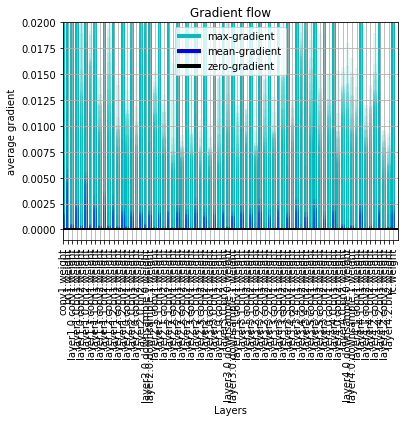

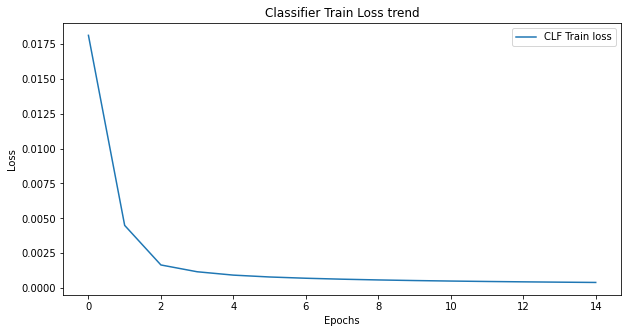

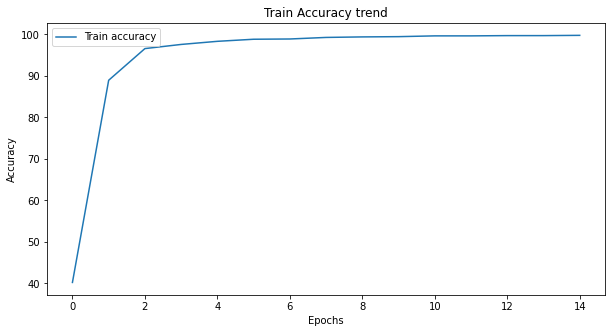


 Final baseline accuracy Product -> Real World: 80.75


In [ ]:
acc_base = main(train_loader=product_train_loader, test_loader=rw_test_loader)
print(f"\nFinal baseline accuracy Product -> Real World: {acc_base}")

#### 6.1.2 Upper bound

Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [01:10<00:00,  5.41s/batch, accuracy=30.3, loss=1.46]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.27s/batch, accuracy=80.1, loss=0.754]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.26s/batch, accuracy=91.9, loss=0.322]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [01:11<00:00,  5.54s/batch, accuracy=95.2, loss=0.223]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.28s/batch, accuracy=96.8, loss=0.182]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.24s/batch, accuracy=97.6, loss=0.15]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [01:09<00:00,  5.38s/batch, accuracy=97.8, loss=0.126]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.24s/batch, accuracy=98.4, loss=0.112]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.28s/batch, accuracy=98.8, loss=0.101]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [01:09<00:00,  5.34s/batch, accuracy=98.9, loss=0.092]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.29s/batch, accuracy=99.1, loss=0.0847]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [01:07<00:00,  5.19s/batch, accuracy=99.3, loss=0.0787]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.25s/batch, accuracy=99.4, loss=0.0736]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.26s/batch, accuracy=99.6, loss=0.0693]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [01:07<00:00,  5.20s/batch, accuracy=99.8, loss=0.0655]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:15<00:00,  3.87s/batch, accuracy=91.8, loss=0.154]


============================ Trends ============================


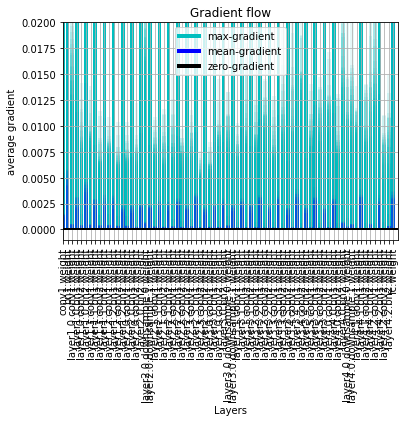

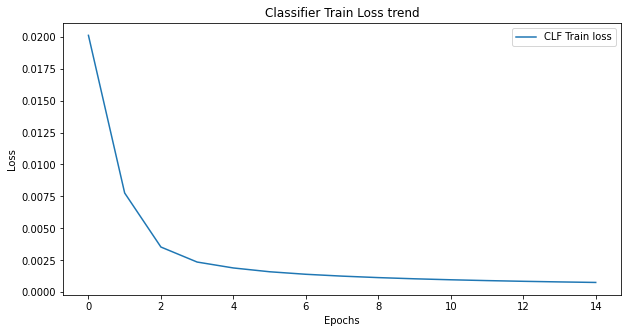

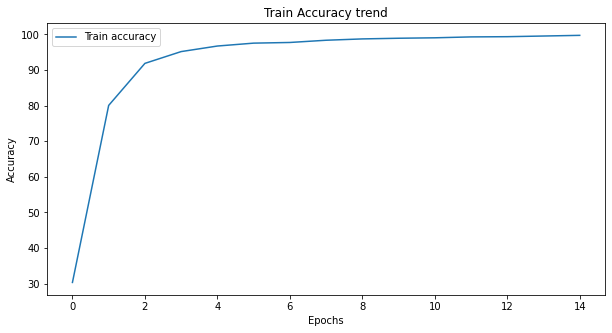


Upper Bound accuracy Product -> Real World: 91.75


In [ ]:
acc_upperbound = main(train_loader=rw_train_loader, test_loader=rw_test_loader)
print(f"\nUpper Bound accuracy Product -> Real World: {acc_upperbound}")

#### 6.1.3 Domain Adaptation

In [ ]:
# just in case main_uda give out of memory problems
gc.collect()

1977519

In [ ]:
torch.cuda.empty_cache()

Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.43s/batch, accuracy=59.3, clf_loss=0.0437, fe_loss=0.0167]


Epoch: 2


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.35s/batch, accuracy=93.1, clf_loss=0.0148, fe_loss=0.011]


Epoch: 3


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.38s/batch, accuracy=97.5, clf_loss=0.00849, fe_loss=0.0126]


Epoch: 4


# Batch for training step : 12: 100%|██████████| 13/13 [02:00<00:00,  9.30s/batch, accuracy=97.8, clf_loss=0.00723, fe_loss=0.0141]


Epoch: 5


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.41s/batch, accuracy=98.1, clf_loss=0.00718, fe_loss=0.0143]


Epoch: 6


# Batch for training step : 12: 100%|██████████| 13/13 [02:00<00:00,  9.30s/batch, accuracy=98.2, clf_loss=0.00745, fe_loss=0.0139]


Epoch: 7


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.33s/batch, accuracy=98.5, clf_loss=0.00769, fe_loss=0.0133]


Epoch: 8


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.41s/batch, accuracy=98.8, clf_loss=0.00783, fe_loss=0.0128]


Epoch: 9


# Batch for training step : 12: 100%|██████████| 13/13 [02:00<00:00,  9.29s/batch, accuracy=98.9, clf_loss=0.00787, fe_loss=0.0123]


Epoch: 10


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.42s/batch, accuracy=98.9, clf_loss=0.00782, fe_loss=0.0119]


Epoch: 11


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.31s/batch, accuracy=99, clf_loss=0.00771, fe_loss=0.0116]


Epoch: 12


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.32s/batch, accuracy=99.1, clf_loss=0.00756, fe_loss=0.0114]


Epoch: 13


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.39s/batch, accuracy=99.1, clf_loss=0.0074, fe_loss=0.0112]


Epoch: 14


# Batch for training step : 12: 100%|██████████| 13/13 [02:00<00:00,  9.29s/batch, accuracy=99.2, clf_loss=0.00724, fe_loss=0.011]


Epoch: 15


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.35s/batch, accuracy=99.4, clf_loss=0.0071, fe_loss=0.0108]


Performing test step ...


# Batch for training step : 3: 100%|██████████| 4/4 [00:15<00:00,  3.90s/batch, accuracy=89.8, loss=0.112]


============================ Trends ============================


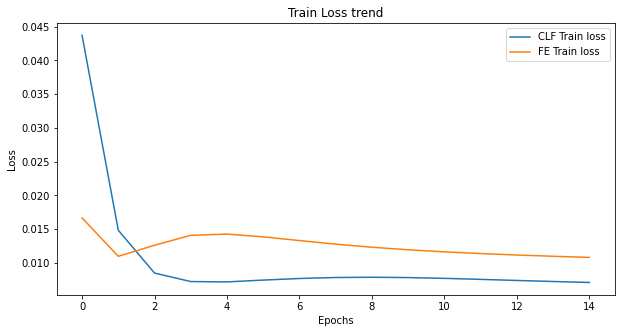

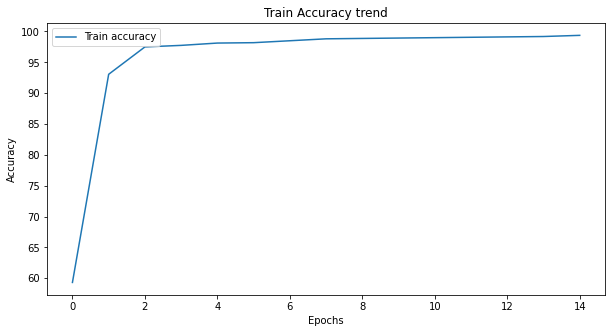


Domain adaptation accuracy Product -> Real World: 89.75


In [ ]:
acc_da = main_uda(source_train_loader=product_train_loader, 
                  target_train_loader=rw_train_loader, 
                  target_test_loader=rw_test_loader
                  )
print(f"\nDomain adaptation accuracy Product -> Real World: {acc_da}")

### 6.2 Real World $\to$ Product
#### 6.2.1 Baseline

Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.25s/batch, accuracy=29.7, loss=1.6]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [01:15<00:00,  5.83s/batch, accuracy=81.9, loss=0.74]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [01:10<00:00,  5.40s/batch, accuracy=91.6, loss=0.353]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [01:11<00:00,  5.51s/batch, accuracy=95.8, loss=0.238]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.28s/batch, accuracy=96.8, loss=0.194]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [01:11<00:00,  5.47s/batch, accuracy=97.4, loss=0.158]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [01:16<00:00,  5.89s/batch, accuracy=98.1, loss=0.133]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [01:11<00:00,  5.46s/batch, accuracy=98.8, loss=0.118]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.26s/batch, accuracy=99, loss=0.107]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [01:09<00:00,  5.38s/batch, accuracy=99.2, loss=0.097]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.27s/batch, accuracy=99.5, loss=0.0893]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.28s/batch, accuracy=99.5, loss=0.0829]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [01:09<00:00,  5.33s/batch, accuracy=99.7, loss=0.0776]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [01:09<00:00,  5.37s/batch, accuracy=99.8, loss=0.073]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [01:08<00:00,  5.28s/batch, accuracy=99.9, loss=0.0691]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.41s/batch, accuracy=91.8, loss=0.0892]


============================ Trends ============================


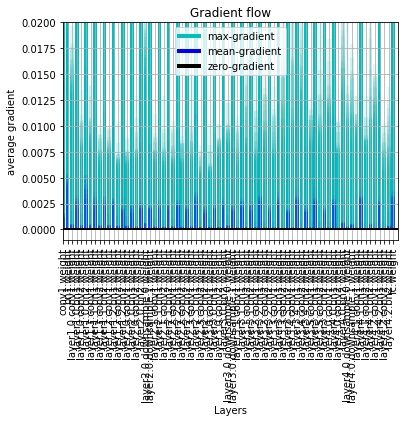

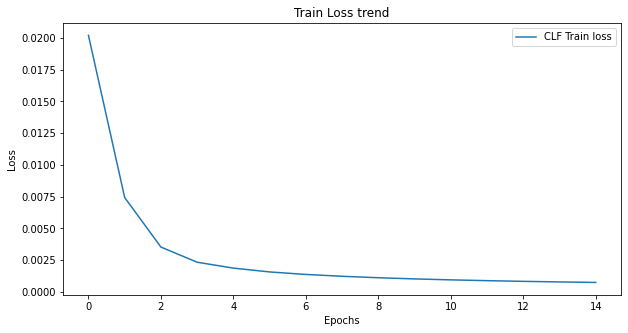

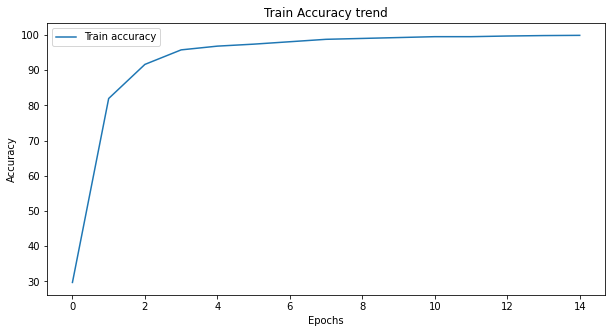


Baseline accuracy Real World -> Product: 91.75


In [ ]:
acc_base = main(train_loader=rw_train_loader, test_loader=product_test_loader)
print(f"\nBaseline accuracy Real World -> Product: {acc_base}")

#### 6.2.2 Upper bound

Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.45s/batch, accuracy=43.9, loss=0.836]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [00:45<00:00,  3.51s/batch, accuracy=91.5, loss=0.238]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.41s/batch, accuracy=96.6, loss=0.0963]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [00:54<00:00,  4.17s/batch, accuracy=98, loss=0.0718]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.45s/batch, accuracy=98.6, loss=0.0559]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.44s/batch, accuracy=98.9, loss=0.0492]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [00:45<00:00,  3.51s/batch, accuracy=99.1, loss=0.044]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.45s/batch, accuracy=99.2, loss=0.0402]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.42s/batch, accuracy=99.3, loss=0.0373]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.46s/batch, accuracy=99.5, loss=0.0348]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.42s/batch, accuracy=99.6, loss=0.0328]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [00:45<00:00,  3.48s/batch, accuracy=99.6, loss=0.031]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [00:45<00:00,  3.46s/batch, accuracy=99.6, loss=0.0295]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.43s/batch, accuracy=99.6, loss=0.0282]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [00:44<00:00,  3.43s/batch, accuracy=99.6, loss=0.0271]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.39s/batch, accuracy=96.8, loss=0.0289]


============================ Trends ============================


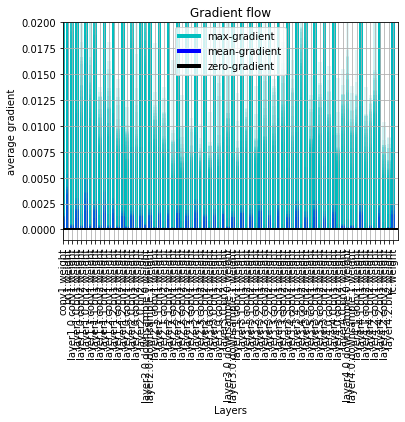

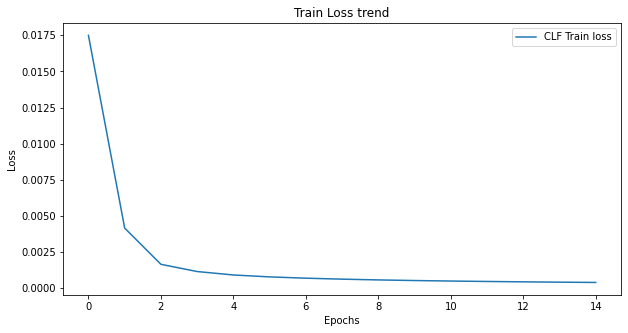

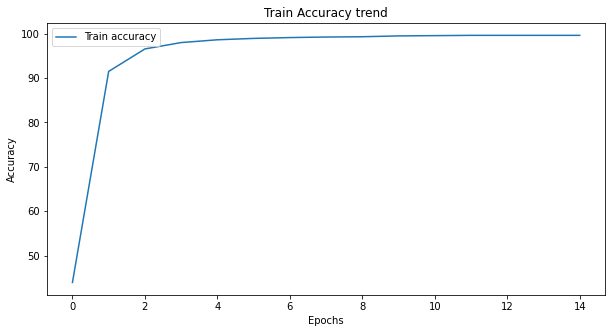


Upper Bound accuracy Real World -> Product: 96.75


In [ ]:
acc_upperbound = main(train_loader=product_train_loader, 
                      test_loader=product_test_loader)
print(f"\nUpper Bound accuracy Real World -> Product: {acc_upperbound}")

#### 6.2.3 Domain Adaptation

In [ ]:
gc.collect()

In [ ]:
torch.cuda.empty_cache()

Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.45s/batch, accuracy=44.2, clf_loss=0.0496, fe_loss=0.0196]


Epoch: 2


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.44s/batch, accuracy=82.8, clf_loss=0.024, fe_loss=0.015]


Epoch: 3


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.36s/batch, accuracy=90.5, clf_loss=0.0139, fe_loss=0.0127]


Epoch: 4


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.40s/batch, accuracy=94, clf_loss=0.0104, fe_loss=0.0121]


Epoch: 5


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.37s/batch, accuracy=95.2, clf_loss=0.00934, fe_loss=0.012]


Epoch: 6


# Batch for training step : 12: 100%|██████████| 13/13 [02:03<00:00,  9.47s/batch, accuracy=96.3, clf_loss=0.00891, fe_loss=0.0117]


Epoch: 7


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.42s/batch, accuracy=96.9, clf_loss=0.00871, fe_loss=0.0114]


Epoch: 8


# Batch for training step : 12: 100%|██████████| 13/13 [02:03<00:00,  9.47s/batch, accuracy=97.4, clf_loss=0.0085, fe_loss=0.0111]


Epoch: 9


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.44s/batch, accuracy=97.6, clf_loss=0.00828, fe_loss=0.0108]


Epoch: 10


# Batch for training step : 12: 100%|██████████| 13/13 [02:04<00:00,  9.58s/batch, accuracy=98.1, clf_loss=0.00807, fe_loss=0.0106]


Epoch: 11


# Batch for training step : 12: 100%|██████████| 13/13 [02:03<00:00,  9.47s/batch, accuracy=98.3, clf_loss=0.0079, fe_loss=0.0104]


Epoch: 12


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.43s/batch, accuracy=98.6, clf_loss=0.00774, fe_loss=0.0102]


Epoch: 13


# Batch for training step : 12: 100%|██████████| 13/13 [02:03<00:00,  9.48s/batch, accuracy=98.6, clf_loss=0.0076, fe_loss=0.01]


Epoch: 14


# Batch for training step : 12: 100%|██████████| 13/13 [02:01<00:00,  9.38s/batch, accuracy=98.8, clf_loss=0.00747, fe_loss=0.00988]


Epoch: 15


# Batch for training step : 12: 100%|██████████| 13/13 [02:02<00:00,  9.44s/batch, accuracy=98.8, clf_loss=0.00736, fe_loss=0.00976]


Performing test step ...


# Batch for training step : 3: 100%|██████████| 4/4 [00:09<00:00,  2.44s/batch, accuracy=95.2, loss=0.0145]


============================ Trends ============================


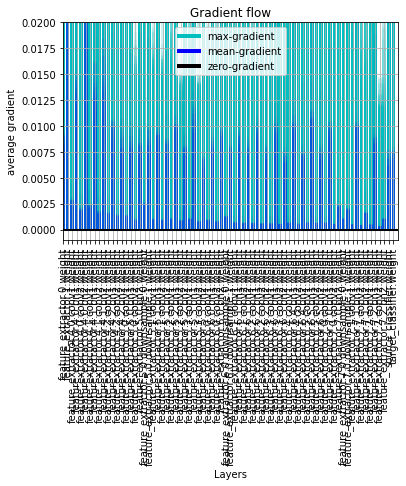

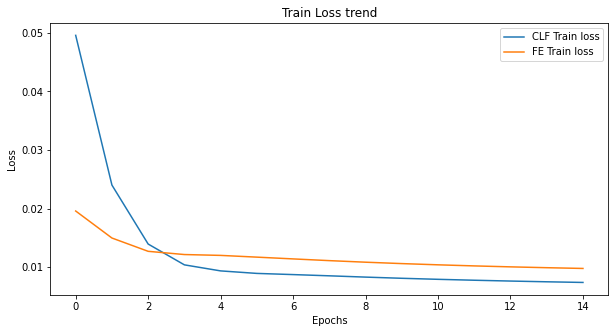

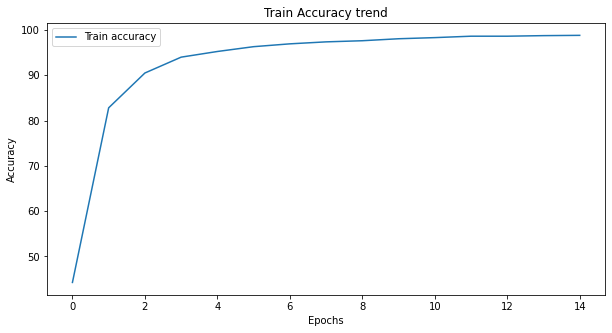


Domain adaptation accuracy Product -> Real World: 95.25


In [ ]:
acc_da = main_uda(rw_train_loader, product_train_loader, product_test_loader, img_root=rootdir)
print(f"\nDomain adaptation accuracy Product -> Real World: {acc_da}")

## 7. Testing statistical significance of the result
It's easy to see from the accuracies above that the domain adaptation method outperforms the baseline. But we want to be sure that the result is statistically significant.
In order to do that, we are going to follow the method proposed by the following paper:
[Approximate Statistical Tests for Comparing
Supervised Classification Learning Algorithms](https://sci2s.ugr.es/keel/pdf/algorithm/articulo/dietterich1998.pdf). To be precise (Since the paper shows more methods), we are referring to the method proposed in section 3.5: **"The 5x2cv paired t test"**.

### 7.1 How it works
5 replications of 2-fold cross validation are performed. Each replication will therefore have two non-overlapping sets of data that we can call $S_1$ and $S_2$. Let A be the first algotihm and B the second one. By training each algorithm on one set and testing on the other, we obtain four error estimates: $p_A^{(1)}$, $p_B^{(1)}$ (Trained on $S_1$ and tested on $S_2$) and $p_A^{(2)}$, $p_B^{(2)}$ (Trained on $S_2$ and tested on $S_1$). From these error estimates we can compute the difference between the two algorithms: $p^{(1)} = p_A^{(1)} - p_B^{(1)}$ and $p^{(2)} = p_A^{(2)} - p_B^{(2)}$.
The mean then becomes $\bar{p} = \frac{p^{(1)} + p^{(2)}}{2}$. The estimated variance is $s^2 = (p^{(1)} - \bar{p})^2 + (p^{(2)} - \bar{p})^2$.
Then the following statistics is computed: $$\tilde{t} = \frac{p_1^{(1)}} {\sqrt{\frac{1}{5} \sum_{i=1}^{5} s_i^2}}$$

Under the null hypothesis $\tilde{t}$ has approximately a t distribution with 5 degrees of freedom (Demonstration omitted. It can be found on the paper under the section where the 5x2cv paired t test method is explained). So the null hypothesis can be rejected if $|\tilde{t} > t_{5, 0.95}|$.

In [ ]:
def student_test(model1, 
                 model2, 
                 replications: int, 
                 random_sate_list: List[int], 
                 alpha: float, 
                 degree_of_freedom: int, 
                 root_dir: str=rootdir, 
                 batch_size: int=BATCH_SIZE
                 ) -> Tuple[int, str]:

  ''' Function that performes T-test of two models

    Parameters :
    ------------

      model1 :
        first model to compare

      model2 :
        second model to compare

      replications: int
        number of replications of 2-fold cross-validation 

      random_state_list: list(int)
        list of random states when performing 5 times the dataset split

      alpha: float
        reference value to address statistical significance

      degree_of_freedom: int

      root_dir: str
        default: global constant "rootdir"
        path to adaptiope_small

      batch_size: int
        default : gloabl constant BATCH_SIZE=128
        number of samples in a batch

    Returns :
    ------------

      p_value : float

      string : str
        whether statistical significan or not 

  '''

  p1s = []
  p2s = []
  variances = []
  for rep in range(replications):
    print(f"============================ Run # {rep} ============================")
    source_train_loader, source_test_loader, target_train_loader, target_test_loader = get_data(batch_size=batch_size, 
                                  root_dir=root_dir, 
                                  random_state=random_sate_list[rep], 
                                  test_split=0.5)
    
    print("============================ Baseline ============================")
    tst_acc_model1 = model1(source_train_loader, 
                            target_test_loader, 
                            trends=False, 
                            grad_flow=False)
    
    print("============================ SymNet ============================")
    tst_acc_model2 = model2(source_train_loader, 
                            target_train_loader, 
                            target_test_loader, 
                            trends=False, 
                            grad_flow=False)
    
    p1 = tst_acc_model1 - tst_acc_model2
    
    print("============================ Baseline ============================")
    tst_acc_model1 = model1(source_test_loader, 
                            target_train_loader, 
                            trends=False, 
                            grad_flow=False)
    print("============================ SymNet ============================")
    tst_acc_model2 = model2(source_test_loader, 
                            target_test_loader, 
                            target_train_loader, 
                            trends=False, 
                            grad_flow=False)
    
    p2 = tst_acc_model1 - tst_acc_model2
    if rep == 1:
      # to save difference of very first repetition
      p11 = p1
      p21 = p2
  
    p_mean = (p1+p2)/2
    # s^2 = (p1-p_mean)^2 + (p2-p_mean)^2
    variance_i = (p1 - p_mean)**2 + (p2 - p_mean)**2
    variances.append(variance_i)
  
  variances = np.array(variances)
  t = p11 / (math.sqrt(np.mean(variances)))
  # https://stackoverflow.com/questions/23879049/finding-two-tailed-p-value-from-t-distribution-and-degrees-of-freedom-in-python
  p_value = stat.t.sf(abs(t), df=degree_of_freedom)

  if p_value < alpha:
    string = 'Null hypothesis rejected. Significance difference in performance between models.'
  else :
    string = 'No singificant difference.'

  return p_value, string

============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.55s/batch, accuracy=22.3, loss=2.01]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:29<00:00,  3.63s/batch, accuracy=84, loss=0.864]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:30<00:00,  3.81s/batch, accuracy=94.9, loss=0.449]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.51s/batch, accuracy=96.2, loss=0.311]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.50s/batch, accuracy=96.9, loss=0.248]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:31<00:00,  3.88s/batch, accuracy=98, loss=0.206]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.48s/batch, accuracy=98.2, loss=0.176]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:29<00:00,  3.66s/batch, accuracy=98.6, loss=0.156]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.53s/batch, accuracy=98.7, loss=0.14]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.49s/batch, accuracy=99.2, loss=0.128]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.54s/batch, accuracy=99.2, loss=0.118]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.49s/batch, accuracy=99.5, loss=0.11]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.48s/batch, accuracy=99.6, loss=0.103]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.55s/batch, accuracy=99.7, loss=0.0967]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=99.7, loss=0.0914]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:39<00:00,  4.98s/batch, accuracy=75.8, loss=0.899]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.50s/batch, accuracy=42.7, clf_loss=0.0516, fe_loss=0.0204]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:17<00:00,  9.65s/batch, accuracy=93, clf_loss=0.027, fe_loss=0.0176]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.49s/batch, accuracy=96.5, clf_loss=0.0148, fe_loss=0.0174]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.50s/batch, accuracy=96.9, clf_loss=0.0107, fe_loss=0.0182]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:17<00:00,  9.65s/batch, accuracy=97.2, clf_loss=0.0091, fe_loss=0.0185]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.50s/batch, accuracy=97.3, clf_loss=0.00834, fe_loss=0.0181]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:17<00:00,  9.64s/batch, accuracy=97.6, clf_loss=0.00799, fe_loss=0.0175]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.49s/batch, accuracy=97.9, clf_loss=0.00784, fe_loss=0.0167]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.50s/batch, accuracy=98, clf_loss=0.00777, fe_loss=0.0159]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:17<00:00,  9.65s/batch, accuracy=98.3, clf_loss=0.00774, fe_loss=0.0153]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.39s/batch, accuracy=98.4, clf_loss=0.00771, fe_loss=0.0147]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.59s/batch, accuracy=98.5, clf_loss=0.00769, fe_loss=0.0142]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.42s/batch, accuracy=98.8, clf_loss=0.00767, fe_loss=0.0137]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.45s/batch, accuracy=99.1, clf_loss=0.00764, fe_loss=0.0134]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=99.3, clf_loss=0.00761, fe_loss=0.013]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:38<00:00,  4.78s/batch, accuracy=87.4, loss=0.473]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=17.9, loss=2.08]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.55s/batch, accuracy=83.7, loss=0.901]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.43s/batch, accuracy=95.3, loss=0.444]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=97.1, loss=0.287]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=98.5, loss=0.221]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=98.5, loss=0.179]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.60s/batch, accuracy=98.8, loss=0.151]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99, loss=0.133]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.56s/batch, accuracy=99.2, loss=0.12]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.4, loss=0.11]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.5, loss=0.102]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=99.6, loss=0.0955]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=99.6, loss=0.0898]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=99.7, loss=0.0849]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.59s/batch, accuracy=99.7, loss=0.0807]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:38<00:00,  4.79s/batch, accuracy=77.1, loss=0.873]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.38s/batch, accuracy=36.7, clf_loss=0.0523, fe_loss=0.0208]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.53s/batch, accuracy=90.6, clf_loss=0.028, fe_loss=0.018]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.38s/batch, accuracy=96.6, clf_loss=0.015, fe_loss=0.0173]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=97, clf_loss=0.0109, fe_loss=0.0181]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=97.7, clf_loss=0.00916, fe_loss=0.0184]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=97.7, clf_loss=0.0084, fe_loss=0.0181]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.58s/batch, accuracy=98, clf_loss=0.00807, fe_loss=0.0174]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.46s/batch, accuracy=98.2, clf_loss=0.00793, fe_loss=0.0167]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.59s/batch, accuracy=98.4, clf_loss=0.00786, fe_loss=0.016]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=98.5, clf_loss=0.00782, fe_loss=0.0153]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.55s/batch, accuracy=98.8, clf_loss=0.00778, fe_loss=0.0148]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.42s/batch, accuracy=99, clf_loss=0.00775, fe_loss=0.0143]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.40s/batch, accuracy=99, clf_loss=0.00771, fe_loss=0.0138]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.52s/batch, accuracy=99.1, clf_loss=0.00767, fe_loss=0.0135]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.35s/batch, accuracy=99.2, clf_loss=0.00762, fe_loss=0.0131]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:38<00:00,  4.87s/batch, accuracy=85.8, loss=0.475]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.49s/batch, accuracy=20.9, loss=2.05]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=86.4, loss=0.722]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=94.7, loss=0.36]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=96.8, loss=0.225]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=97.5, loss=0.166]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.58s/batch, accuracy=98.4, loss=0.137]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=98.7, loss=0.118]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=98.8, loss=0.105]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=99, loss=0.0949]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.1, loss=0.087]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.41s/batch, accuracy=99.3, loss=0.0807]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=99.3, loss=0.0755]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.54s/batch, accuracy=99.4, loss=0.0711]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:29<00:00,  3.68s/batch, accuracy=99.4, loss=0.0674]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.5, loss=0.0641]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:37<00:00,  4.65s/batch, accuracy=77, loss=0.866]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=43.3, clf_loss=0.0517, fe_loss=0.0205]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.28s/batch, accuracy=92.6, clf_loss=0.0274, fe_loss=0.0178]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.37s/batch, accuracy=96.7, clf_loss=0.0149, fe_loss=0.0175]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.36s/batch, accuracy=97.4, clf_loss=0.0108, fe_loss=0.0184]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.29s/batch, accuracy=97.8, clf_loss=0.0091, fe_loss=0.0188]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.36s/batch, accuracy=97.8, clf_loss=0.00836, fe_loss=0.0184]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.34s/batch, accuracy=98.1, clf_loss=0.00802, fe_loss=0.0178]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.38s/batch, accuracy=98.2, clf_loss=0.00788, fe_loss=0.017]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.29s/batch, accuracy=98.3, clf_loss=0.00784, fe_loss=0.0162]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.39s/batch, accuracy=98.4, clf_loss=0.00782, fe_loss=0.0156]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.34s/batch, accuracy=98.6, clf_loss=0.00781, fe_loss=0.015]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.34s/batch, accuracy=98.7, clf_loss=0.0078, fe_loss=0.0144]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.30s/batch, accuracy=98.9, clf_loss=0.00778, fe_loss=0.014]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.30s/batch, accuracy=98.9, clf_loss=0.00775, fe_loss=0.0136]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.43s/batch, accuracy=99.1, clf_loss=0.00771, fe_loss=0.0133]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:37<00:00,  4.65s/batch, accuracy=86.9, loss=0.535]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.36s/batch, accuracy=18.6, loss=2.06]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.34s/batch, accuracy=82.9, loss=0.76]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.33s/batch, accuracy=95.2, loss=0.356]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.43s/batch, accuracy=96, loss=0.235]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.34s/batch, accuracy=97.5, loss=0.172]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.34s/batch, accuracy=98, loss=0.14]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.32s/batch, accuracy=98.4, loss=0.122]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.33s/batch, accuracy=98.9, loss=0.11]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.37s/batch, accuracy=99.1, loss=0.0994]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=99.4, loss=0.0909]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.37s/batch, accuracy=99.5, loss=0.0841]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.35s/batch, accuracy=99.6, loss=0.0787]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.34s/batch, accuracy=99.7, loss=0.0741]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.36s/batch, accuracy=99.7, loss=0.0702]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.35s/batch, accuracy=99.7, loss=0.0668]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:38<00:00,  4.83s/batch, accuracy=79.1, loss=0.777]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:13<00:00,  9.24s/batch, accuracy=40, clf_loss=0.0518, fe_loss=0.0205]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:13<00:00,  9.24s/batch, accuracy=93.3, clf_loss=0.0271, fe_loss=0.0176]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.26s/batch, accuracy=96.4, clf_loss=0.0147, fe_loss=0.0172]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.26s/batch, accuracy=97, clf_loss=0.0106, fe_loss=0.0179]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.35s/batch, accuracy=97.4, clf_loss=0.00895, fe_loss=0.0181]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.26s/batch, accuracy=97.8, clf_loss=0.00822, fe_loss=0.0178]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.25s/batch, accuracy=98, clf_loss=0.00788, fe_loss=0.0171]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:13<00:00,  9.24s/batch, accuracy=98.5, clf_loss=0.00773, fe_loss=0.0164]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.33s/batch, accuracy=98.6, clf_loss=0.00766, fe_loss=0.0156]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.25s/batch, accuracy=98.8, clf_loss=0.00762, fe_loss=0.015]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.33s/batch, accuracy=98.9, clf_loss=0.00759, fe_loss=0.0144]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:13<00:00,  9.22s/batch, accuracy=99, clf_loss=0.00755, fe_loss=0.0139]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.27s/batch, accuracy=99.1, clf_loss=0.00752, fe_loss=0.0135]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.26s/batch, accuracy=99.3, clf_loss=0.00748, fe_loss=0.0131]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.26s/batch, accuracy=99.3, clf_loss=0.00743, fe_loss=0.0128]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:39<00:00,  4.91s/batch, accuracy=86.8, loss=0.521]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.41s/batch, accuracy=19.3, loss=2.15]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.39s/batch, accuracy=86.7, loss=0.826]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.41s/batch, accuracy=95.2, loss=0.404]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=96.9, loss=0.262]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=97.7, loss=0.193]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.55s/batch, accuracy=97.9, loss=0.158]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=98.4, loss=0.137]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.50s/batch, accuracy=98.6, loss=0.121]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=98.8, loss=0.109]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=98.8, loss=0.0996]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.2, loss=0.0921]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.52s/batch, accuracy=99.2, loss=0.086]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.43s/batch, accuracy=99.4, loss=0.0807]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.41s/batch, accuracy=99.4, loss=0.0762]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.5, loss=0.0722]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:37<00:00,  4.72s/batch, accuracy=77.3, loss=0.937]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.52s/batch, accuracy=37.1, clf_loss=0.052, fe_loss=0.0206]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.35s/batch, accuracy=92.6, clf_loss=0.0276, fe_loss=0.0179]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.44s/batch, accuracy=96.4, clf_loss=0.0151, fe_loss=0.0174]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.33s/batch, accuracy=97.4, clf_loss=0.0108, fe_loss=0.0182]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.57s/batch, accuracy=98, clf_loss=0.00913, fe_loss=0.0185]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=98.4, clf_loss=0.00836, fe_loss=0.0181]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.48s/batch, accuracy=98.6, clf_loss=0.00801, fe_loss=0.0175]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.42s/batch, accuracy=98.7, clf_loss=0.00786, fe_loss=0.0167]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.50s/batch, accuracy=98.8, clf_loss=0.00779, fe_loss=0.016]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.36s/batch, accuracy=98.8, clf_loss=0.00776, fe_loss=0.0154]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.44s/batch, accuracy=98.8, clf_loss=0.00773, fe_loss=0.0148]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.36s/batch, accuracy=98.8, clf_loss=0.00771, fe_loss=0.0143]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.45s/batch, accuracy=98.8, clf_loss=0.00769, fe_loss=0.0139]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.36s/batch, accuracy=98.9, clf_loss=0.00766, fe_loss=0.0135]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.47s/batch, accuracy=99, clf_loss=0.00763, fe_loss=0.0132]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:37<00:00,  4.74s/batch, accuracy=86.1, loss=0.49]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=22.7, loss=1.98]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=85.4, loss=0.844]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.43s/batch, accuracy=95.5, loss=0.4]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.55s/batch, accuracy=96.5, loss=0.258]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.43s/batch, accuracy=97.2, loss=0.195]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=97.8, loss=0.161]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.40s/batch, accuracy=98.1, loss=0.14]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.43s/batch, accuracy=98.5, loss=0.124]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=98.8, loss=0.112]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.52s/batch, accuracy=99, loss=0.103]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.41s/batch, accuracy=99.1, loss=0.0952]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.3, loss=0.089]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=99.4, loss=0.0838]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.43s/batch, accuracy=99.5, loss=0.0793]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.5, loss=0.0754]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:39<00:00,  4.90s/batch, accuracy=76.6, loss=0.829]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.36s/batch, accuracy=37, clf_loss=0.0519, fe_loss=0.0206]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.49s/batch, accuracy=92.9, clf_loss=0.027, fe_loss=0.0176]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.37s/batch, accuracy=96.7, clf_loss=0.0147, fe_loss=0.0173]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.50s/batch, accuracy=97.3, clf_loss=0.0107, fe_loss=0.0181]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.38s/batch, accuracy=97.3, clf_loss=0.00907, fe_loss=0.0184]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.49s/batch, accuracy=97.7, clf_loss=0.00834, fe_loss=0.018]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.37s/batch, accuracy=98, clf_loss=0.00801, fe_loss=0.0173]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.46s/batch, accuracy=98.2, clf_loss=0.00786, fe_loss=0.0166]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.37s/batch, accuracy=98.2, clf_loss=0.00779, fe_loss=0.0158]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.49s/batch, accuracy=98.5, clf_loss=0.00775, fe_loss=0.0151]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.39s/batch, accuracy=98.9, clf_loss=0.00771, fe_loss=0.0146]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.50s/batch, accuracy=98.9, clf_loss=0.00768, fe_loss=0.0141]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.40s/batch, accuracy=99.1, clf_loss=0.00764, fe_loss=0.0136]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.51s/batch, accuracy=99.3, clf_loss=0.0076, fe_loss=0.0133]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.44s/batch, accuracy=99.3, clf_loss=0.00755, fe_loss=0.0129]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:38<00:00,  4.85s/batch, accuracy=87.4, loss=0.464]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.58s/batch, accuracy=25.2, loss=2.06]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=82.1, loss=0.831]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=95.1, loss=0.417]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=96.7, loss=0.272]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=97.4, loss=0.207]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=98, loss=0.17]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.57s/batch, accuracy=98.4, loss=0.146]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.48s/batch, accuracy=98.8, loss=0.128]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=98.8, loss=0.116]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=98.9, loss=0.106]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=99.1, loss=0.0983]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.57s/batch, accuracy=99.2, loss=0.0919]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=99.5, loss=0.0865]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=99.6, loss=0.0818]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.43s/batch, accuracy=99.7, loss=0.0777]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:38<00:00,  4.77s/batch, accuracy=77.2, loss=0.954]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.44s/batch, accuracy=36.6, clf_loss=0.0523, fe_loss=0.0208]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=93.6, clf_loss=0.0275, fe_loss=0.0179]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.55s/batch, accuracy=96.3, clf_loss=0.0151, fe_loss=0.0175]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=97, clf_loss=0.0109, fe_loss=0.0182]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.57s/batch, accuracy=97.2, clf_loss=0.00922, fe_loss=0.0184]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.43s/batch, accuracy=97.6, clf_loss=0.00845, fe_loss=0.0181]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=98, clf_loss=0.00809, fe_loss=0.0174]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.48s/batch, accuracy=98.4, clf_loss=0.00791, fe_loss=0.0166]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.43s/batch, accuracy=98.6, clf_loss=0.00781, fe_loss=0.0159]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.51s/batch, accuracy=98.8, clf_loss=0.00775, fe_loss=0.0153]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.40s/batch, accuracy=98.8, clf_loss=0.00771, fe_loss=0.0147]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.52s/batch, accuracy=98.9, clf_loss=0.00767, fe_loss=0.0142]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.40s/batch, accuracy=98.9, clf_loss=0.00763, fe_loss=0.0137]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.52s/batch, accuracy=98.9, clf_loss=0.0076, fe_loss=0.0134]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.41s/batch, accuracy=99, clf_loss=0.00756, fe_loss=0.013]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:38<00:00,  4.80s/batch, accuracy=87.3, loss=0.551]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.51s/batch, accuracy=18.8, loss=2.15]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.48s/batch, accuracy=83.5, loss=0.881]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=95.2, loss=0.417]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=96.6, loss=0.264]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=97.6, loss=0.204]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.57s/batch, accuracy=97.8, loss=0.171]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=98.1, loss=0.148]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.56s/batch, accuracy=98.3, loss=0.131]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.44s/batch, accuracy=98.7, loss=0.118]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=98.8, loss=0.108]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.46s/batch, accuracy=99, loss=0.1]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.59s/batch, accuracy=99.2, loss=0.0937]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.55s/batch, accuracy=99.3, loss=0.0883]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=99.4, loss=0.0837]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.40s/batch, accuracy=99.6, loss=0.0797]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:37<00:00,  4.72s/batch, accuracy=76, loss=0.836]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.46s/batch, accuracy=38.1, clf_loss=0.052, fe_loss=0.0206]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.40s/batch, accuracy=91.5, clf_loss=0.0271, fe_loss=0.0177]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.44s/batch, accuracy=96.9, clf_loss=0.0147, fe_loss=0.0172]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.34s/batch, accuracy=96.8, clf_loss=0.0106, fe_loss=0.0181]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.34s/batch, accuracy=97.4, clf_loss=0.00895, fe_loss=0.0184]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.42s/batch, accuracy=97.9, clf_loss=0.00819, fe_loss=0.0182]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.42s/batch, accuracy=98.3, clf_loss=0.00786, fe_loss=0.0175]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.52s/batch, accuracy=98.4, clf_loss=0.00772, fe_loss=0.0168]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:14<00:00,  9.31s/batch, accuracy=98.6, clf_loss=0.00769, fe_loss=0.016]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.55s/batch, accuracy=98.6, clf_loss=0.00768, fe_loss=0.0153]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.45s/batch, accuracy=98.8, clf_loss=0.00769, fe_loss=0.0147]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.46s/batch, accuracy=98.8, clf_loss=0.00769, fe_loss=0.0142]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.45s/batch, accuracy=98.8, clf_loss=0.00767, fe_loss=0.0138]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.50s/batch, accuracy=98.8, clf_loss=0.00764, fe_loss=0.0134]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.44s/batch, accuracy=98.8, clf_loss=0.00761, fe_loss=0.0131]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:38<00:00,  4.87s/batch, accuracy=86.3, loss=0.491]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.50s/batch, accuracy=23.7, loss=2.02]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.35s/batch, accuracy=85.4, loss=0.791]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=94.6, loss=0.428]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=96.1, loss=0.281]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.42s/batch, accuracy=96.8, loss=0.214]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.45s/batch, accuracy=97.5, loss=0.18]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.37s/batch, accuracy=97.8, loss=0.158]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.52s/batch, accuracy=98, loss=0.142]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.36s/batch, accuracy=98.4, loss=0.129]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.48s/batch, accuracy=98.7, loss=0.119]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=98.9, loss=0.111]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.38s/batch, accuracy=99, loss=0.104]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=99.1, loss=0.0985]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:26<00:00,  3.37s/batch, accuracy=99.2, loss=0.0935]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.49s/batch, accuracy=99.2, loss=0.089]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:38<00:00,  4.83s/batch, accuracy=76.9, loss=0.808]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.45s/batch, accuracy=42.3, clf_loss=0.052, fe_loss=0.0206]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.53s/batch, accuracy=92.6, clf_loss=0.0273, fe_loss=0.0177]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.56s/batch, accuracy=95.8, clf_loss=0.0151, fe_loss=0.0174]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.40s/batch, accuracy=96.3, clf_loss=0.011, fe_loss=0.0182]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.56s/batch, accuracy=97.1, clf_loss=0.00927, fe_loss=0.0185]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.54s/batch, accuracy=97.7, clf_loss=0.00848, fe_loss=0.0181]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.58s/batch, accuracy=97.9, clf_loss=0.00812, fe_loss=0.0175]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.43s/batch, accuracy=98.2, clf_loss=0.00795, fe_loss=0.0168]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.56s/batch, accuracy=98.3, clf_loss=0.00787, fe_loss=0.016]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.58s/batch, accuracy=98.5, clf_loss=0.00783, fe_loss=0.0153]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.44s/batch, accuracy=98.6, clf_loss=0.0078, fe_loss=0.0147]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.56s/batch, accuracy=98.8, clf_loss=0.00777, fe_loss=0.0142]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.51s/batch, accuracy=99, clf_loss=0.00774, fe_loss=0.0138]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.58s/batch, accuracy=99, clf_loss=0.0077, fe_loss=0.0134]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.45s/batch, accuracy=99, clf_loss=0.00766, fe_loss=0.013]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:38<00:00,  4.83s/batch, accuracy=87, loss=0.37]


============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.59s/batch, accuracy=24.9, loss=2.13]


Epoch 1:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.49s/batch, accuracy=85.2, loss=0.88]


Epoch 2:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.58s/batch, accuracy=94.6, loss=0.425]


Epoch 3:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.61s/batch, accuracy=96.7, loss=0.257]


Epoch 4:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=97.3, loss=0.191]


Epoch 5:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.58s/batch, accuracy=97.6, loss=0.156]


Epoch 6:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.47s/batch, accuracy=98, loss=0.133]


Epoch 7:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.59s/batch, accuracy=98.7, loss=0.116]


Epoch 8:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.58s/batch, accuracy=99.2, loss=0.105]


Epoch 9:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.49s/batch, accuracy=99.4, loss=0.0954]


Epoch 10:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.61s/batch, accuracy=99.5, loss=0.0881]


Epoch 11:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.52s/batch, accuracy=99.5, loss=0.0821]


Epoch 12:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.61s/batch, accuracy=99.7, loss=0.0771]


Epoch 13:


# Batch for training step : 7: 100%|██████████| 8/8 [00:28<00:00,  3.60s/batch, accuracy=99.7, loss=0.0729]


Epoch 14:


# Batch for training step : 7: 100%|██████████| 8/8 [00:27<00:00,  3.49s/batch, accuracy=99.8, loss=0.0693]


Performing test step ...


# Batch for test step: 7: 100%|██████████| 8/8 [00:39<00:00,  4.90s/batch, accuracy=77.2, loss=0.815]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.60s/batch, accuracy=43, clf_loss=0.0519, fe_loss=0.0206]


Epoch: 2


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.50s/batch, accuracy=92.3, clf_loss=0.0274, fe_loss=0.0178]


Epoch: 3


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.56s/batch, accuracy=96, clf_loss=0.0147, fe_loss=0.0174]


Epoch: 4


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.53s/batch, accuracy=97.2, clf_loss=0.0106, fe_loss=0.0182]


Epoch: 5


# Batch for training step : 7: 100%|██████████| 8/8 [01:17<00:00,  9.64s/batch, accuracy=97.9, clf_loss=0.00891, fe_loss=0.0185]


Epoch: 6


# Batch for training step : 7: 100%|██████████| 8/8 [01:17<00:00,  9.64s/batch, accuracy=98, clf_loss=0.00818, fe_loss=0.0182]


Epoch: 7


# Batch for training step : 7: 100%|██████████| 8/8 [01:15<00:00,  9.46s/batch, accuracy=98.3, clf_loss=0.00786, fe_loss=0.0176]


Epoch: 8


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.58s/batch, accuracy=98.7, clf_loss=0.00773, fe_loss=0.0168]


Epoch: 9


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.59s/batch, accuracy=98.9, clf_loss=0.00769, fe_loss=0.0161]


Epoch: 10


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.52s/batch, accuracy=99, clf_loss=0.00767, fe_loss=0.0154]


Epoch: 11


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.55s/batch, accuracy=99.2, clf_loss=0.00765, fe_loss=0.0148]


Epoch: 12


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.51s/batch, accuracy=99.3, clf_loss=0.00763, fe_loss=0.0143]


Epoch: 13


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.54s/batch, accuracy=99.5, clf_loss=0.0076, fe_loss=0.0139]


Epoch: 14


# Batch for training step : 7: 100%|██████████| 8/8 [01:17<00:00,  9.66s/batch, accuracy=99.5, clf_loss=0.00757, fe_loss=0.0135]


Epoch: 15


# Batch for training step : 7: 100%|██████████| 8/8 [01:16<00:00,  9.54s/batch, accuracy=99.6, clf_loss=0.00753, fe_loss=0.0132]


Performing test step ...


# Batch for training step : 7: 100%|██████████| 8/8 [00:39<00:00,  4.89s/batch, accuracy=86.5, loss=0.526]


(p-value, message) : (0.00035602519858327466, 'Null hypothesis rejected. Significance difference in performance between models.')


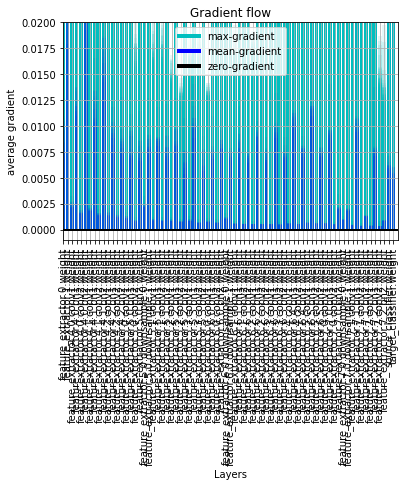

In [ ]:
p_value, message = student_test(model1 = partial(main), 
                                model2 = partial(main_uda), 
                                replications=5, 
                                random_sate_list=[91, 11, 57, 822, 19], 
                                alpha=0.05, 
                                degree_of_freedom=5)

print(f"(p-value, message) : {p_value, message}")

As result we can see that p-value is smaller than 0.05 then the null hypothesis is rejected

## 8. 5-Fold Cross validation
To further address the improvement in performances of our model, we performed a 5-fold cross validation with randomly set seeds. 
We considered just a 5-fold cross validation procedure due to time and computational limitations. 
Finally, average and standard deviation of the accuracies reached across the different runs have been computed as measure, respectively, of precision and stability.

*Notice that we called 5-fold cross validation where instead we train the model 5 times from __scratch__ using different sampling seeds each time when splitting the data.*

In [22]:
def cross_val(rootdir: str= rootdir,
              batch_size = 128,
              direction = 0
              ) -> None:
  """ 5-fold cross validation using 5 random seeds in the splitting procedure

  Parameters :
  ------------

    rootdir: str
        default : global constant "rootdir"
        path to adaptiope_small

    batch_size: int
        default : 128
        size of the batch
    
    direction: int
        default : 0
        direction of the training:
        0: Product -> Real World
        1: Real World -> Product
    
  Returns :
  ------------
    None

  """

  baseline_accuracies = np.empty(0)
  uda_accuracies = np.empty(0)
  upper_bound_accuracies = np.empty(0)
  
  # randomly chosen seeds for the dataset split
  seeds = [91, 11, 57, 822, 19]
  
  for seed in seeds:
    
    print(f"============================ Run # {seeds.index(seed)} ============================")
    print("============================ Baseline ============================")
    if direction == 0:
      source_train_loader, source_test_loader, target_train_loader, target_test_loader = get_data(batch_size=batch_size, 
                                    root_dir=rootdir,
                                    random_state=seed, 
                                    test_split=0.2)
    elif direction == 1:
      target_train_loader, target_test_loader, source_train_loader, source_test_loader = get_data(batch_size=batch_size, 
                                    root_dir=rootdir,
                                    random_state=seed, 
                                    test_split=0.2)
    else:
      raise ValueError("direction value not allowed. Use 0 for product as source and real world as\
                        target and 1 for real world as source and product as target")


    base_acc = main(train_loader=source_train_loader, 
                    test_loader=target_test_loader, 
                    trends=False,
                    grad_flow=False)
    
    baseline_accuracies = np.append(baseline_accuracies, base_acc)


    print("============================ Upper Bound ============================")
    upp_acc = main(train_loader=target_train_loader, 
                    test_loader=target_test_loader, 
                    trends=False,
                    grad_flow=False)
    
    upper_bound_accuracies = np.append(upper_bound_accuracies, upp_acc)


    print("============================ SymNet ============================")
    uda_acc = main_uda(source_train_loader=source_train_loader, 
                       target_train_loader=target_train_loader, 
                       target_test_loader=target_test_loader, 
                       trends=False,
                       grad_flow=False)
    
    uda_accuracies = np.append(uda_accuracies, uda_acc)

  print(f"\nBaseline mean: {baseline_accuracies.mean()}\tBaseline std deviation: {baseline_accuracies.std()}")
  print(f"\nUpper Bound mean: {upper_bound_accuracies.mean()}\tUpper Bound std deviation: {upper_bound_accuracies.std()}")
  print(f"\nSymNet mean: {uda_accuracies.mean()}\tSymNet std deviation: {uda_accuracies.std()}")

  res = [(baseline_accuracies.mean(), baseline_accuracies.std()),
         (upper_bound_accuracies.mean(), upper_bound_accuracies.std()),
         (uda_accuracies.mean(), uda_accuracies.std())]
  
  return res


time: 3.28 ms (started: 2023-01-07 11:56:22 +00:00)


### 8.1 Product $\to$ Real World

In [25]:
res = cross_val() # Interrupted because run it accidentally

============================ Run # 0 ============================
============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


  0%|          | 0/13 [00:02<?, ?batch/s]


KeyboardInterrupt: ignored

time: 2.67 s (started: 2023-01-07 11:16:53 +00:00)


### 8.2 Real World $\to$ Product

In [23]:
res = cross_val(direction = 1)

============================ Run # 0 ============================
============================ Baseline ============================


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [11:58<00:00, 55.29s/batch, accuracy=32.8, loss=1.53]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.10s/batch, accuracy=84.2, loss=0.543]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.01s/batch, accuracy=92.1, loss=0.244]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.10s/batch, accuracy=95.2, loss=0.162]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.03s/batch, accuracy=96.9, loss=0.119]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.09s/batch, accuracy=97.4, loss=0.0968]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.03s/batch, accuracy=98.1, loss=0.0815]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.03s/batch, accuracy=98.4, loss=0.0714]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.10s/batch, accuracy=98.6, loss=0.064]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.04s/batch, accuracy=98.8, loss=0.0582]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.12s/batch, accuracy=98.8, loss=0.0535]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.05s/batch, accuracy=98.9, loss=0.0497]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.13s/batch, accuracy=99.1, loss=0.0465]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.04s/batch, accuracy=99.2, loss=0.0438]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.02s/batch, accuracy=99.4, loss=0.0415]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [02:58<00:00, 44.61s/batch, accuracy=91.2, loss=0.424]


============================ Upper Bound ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [11:58<00:00, 55.25s/batch, accuracy=46.9, loss=0.895]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.18s/batch, accuracy=92.8, loss=0.229]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.25s/batch, accuracy=96.4, loss=0.104]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.18s/batch, accuracy=97.3, loss=0.0744]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.19s/batch, accuracy=97.9, loss=0.0601]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.18s/batch, accuracy=98.6, loss=0.0517]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.25s/batch, accuracy=98.8, loss=0.0462]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.17s/batch, accuracy=99.2, loss=0.0421]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.17s/batch, accuracy=99.2, loss=0.0388]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.17s/batch, accuracy=99.4, loss=0.0362]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.23s/batch, accuracy=99.5, loss=0.034]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.19s/batch, accuracy=99.6, loss=0.0322]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.15s/batch, accuracy=99.7, loss=0.0306]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.18s/batch, accuracy=99.8, loss=0.0292]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.23s/batch, accuracy=99.9, loss=0.028]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.27s/batch, accuracy=96.8, loss=0.146]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.72s/batch, accuracy=41.8, clf_loss=0.0497, fe_loss=0.0196]


Epoch: 2


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.77s/batch, accuracy=86.1, clf_loss=0.0233, fe_loss=0.0146]


Epoch: 3


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.79s/batch, accuracy=91.2, clf_loss=0.0137, fe_loss=0.0127]


Epoch: 4


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.81s/batch, accuracy=94.6, clf_loss=0.0104, fe_loss=0.0121]


Epoch: 5


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.74s/batch, accuracy=95.4, clf_loss=0.00936, fe_loss=0.012]


Epoch: 6


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.77s/batch, accuracy=96.4, clf_loss=0.00896, fe_loss=0.0117]


Epoch: 7


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.78s/batch, accuracy=97, clf_loss=0.00871, fe_loss=0.0114]


Epoch: 8


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.72s/batch, accuracy=97.4, clf_loss=0.00849, fe_loss=0.0111]


Epoch: 9


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.82s/batch, accuracy=97.7, clf_loss=0.00827, fe_loss=0.0108]


Epoch: 10


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.80s/batch, accuracy=97.9, clf_loss=0.00807, fe_loss=0.0106]


Epoch: 11


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.81s/batch, accuracy=98.1, clf_loss=0.00788, fe_loss=0.0103]


Epoch: 12


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.72s/batch, accuracy=98.2, clf_loss=0.00772, fe_loss=0.0102]


Epoch: 13


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.75s/batch, accuracy=98.4, clf_loss=0.00758, fe_loss=0.01]


Epoch: 14


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.75s/batch, accuracy=98.5, clf_loss=0.00745, fe_loss=0.00986]


Epoch: 15


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.70s/batch, accuracy=98.6, clf_loss=0.00733, fe_loss=0.00974]


Performing test step ...


# Batch for training step : 3: 100%|██████████| 4/4 [00:08<00:00,  2.24s/batch, accuracy=96, loss=0.219]


============================ Run # 1 ============================
============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [03:08<00:00, 14.48s/batch, accuracy=29.6, loss=1.52]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.93s/batch, accuracy=86, loss=0.549]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.95s/batch, accuracy=92.8, loss=0.281]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.01s/batch, accuracy=95.6, loss=0.2]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.93s/batch, accuracy=96.8, loss=0.157]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.02s/batch, accuracy=97.4, loss=0.128]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.93s/batch, accuracy=98.4, loss=0.109]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.95s/batch, accuracy=98.9, loss=0.0956]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  5.00s/batch, accuracy=99.2, loss=0.0855]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.94s/batch, accuracy=99.2, loss=0.0777]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [01:03<00:00,  4.92s/batch, accuracy=99.5, loss=0.0713]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.96s/batch, accuracy=99.6, loss=0.0661]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [01:03<00:00,  4.92s/batch, accuracy=99.6, loss=0.0617]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.99s/batch, accuracy=99.6, loss=0.058]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [01:03<00:00,  4.92s/batch, accuracy=99.7, loss=0.0548]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.26s/batch, accuracy=93.8, loss=0.308]


============================ Upper Bound ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.13s/batch, accuracy=44.2, loss=1.05]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.11s/batch, accuracy=93.3, loss=0.329]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.21s/batch, accuracy=96.8, loss=0.145]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.15s/batch, accuracy=98.1, loss=0.101]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.11s/batch, accuracy=98.6, loss=0.0799]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.13s/batch, accuracy=99, loss=0.0667]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.20s/batch, accuracy=99.1, loss=0.058]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.13s/batch, accuracy=99.2, loss=0.0519]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.14s/batch, accuracy=99.4, loss=0.0472]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.12s/batch, accuracy=99.5, loss=0.0436]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.22s/batch, accuracy=99.5, loss=0.0406]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.11s/batch, accuracy=99.5, loss=0.0381]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.13s/batch, accuracy=99.6, loss=0.0361]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.12s/batch, accuracy=99.8, loss=0.0343]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.10s/batch, accuracy=99.8, loss=0.0327]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.25s/batch, accuracy=95.8, loss=0.208]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.71s/batch, accuracy=41.2, clf_loss=0.0499, fe_loss=0.0197]


Epoch: 2


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.70s/batch, accuracy=86.9, clf_loss=0.023, fe_loss=0.0144]


Epoch: 3


# Batch for training step : 12: 100%|██████████| 13/13 [01:51<00:00,  8.60s/batch, accuracy=92, clf_loss=0.0135, fe_loss=0.0125]


Epoch: 4


# Batch for training step : 12: 100%|██████████| 13/13 [01:52<00:00,  8.68s/batch, accuracy=94.2, clf_loss=0.0105, fe_loss=0.0122]


Epoch: 5


# Batch for training step : 12: 100%|██████████| 13/13 [01:52<00:00,  8.64s/batch, accuracy=95.4, clf_loss=0.00946, fe_loss=0.012]


Epoch: 6


# Batch for training step : 12: 100%|██████████| 13/13 [01:51<00:00,  8.57s/batch, accuracy=96.2, clf_loss=0.00906, fe_loss=0.0117]


Epoch: 7


# Batch for training step : 12: 100%|██████████| 13/13 [01:52<00:00,  8.68s/batch, accuracy=96.8, clf_loss=0.00879, fe_loss=0.0114]


Epoch: 8


# Batch for training step : 12: 100%|██████████| 13/13 [01:51<00:00,  8.57s/batch, accuracy=97.3, clf_loss=0.00854, fe_loss=0.0111]


Epoch: 9


# Batch for training step : 12: 100%|██████████| 13/13 [01:52<00:00,  8.65s/batch, accuracy=97.8, clf_loss=0.00831, fe_loss=0.0108]


Epoch: 10


# Batch for training step : 12: 100%|██████████| 13/13 [01:52<00:00,  8.63s/batch, accuracy=98.1, clf_loss=0.00811, fe_loss=0.0106]


Epoch: 11


# Batch for training step : 12: 100%|██████████| 13/13 [01:51<00:00,  8.56s/batch, accuracy=98.3, clf_loss=0.00793, fe_loss=0.0104]


Epoch: 12


# Batch for training step : 12: 100%|██████████| 13/13 [01:51<00:00,  8.60s/batch, accuracy=98.6, clf_loss=0.00778, fe_loss=0.0102]


Epoch: 13


# Batch for training step : 12: 100%|██████████| 13/13 [01:51<00:00,  8.60s/batch, accuracy=98.7, clf_loss=0.00765, fe_loss=0.01]


Epoch: 14


# Batch for training step : 12: 100%|██████████| 13/13 [01:52<00:00,  8.64s/batch, accuracy=99.1, clf_loss=0.00753, fe_loss=0.00986]


Epoch: 15


# Batch for training step : 12: 100%|██████████| 13/13 [01:51<00:00,  8.59s/batch, accuracy=99.1, clf_loss=0.00741, fe_loss=0.00973]


Performing test step ...


# Batch for training step : 3: 100%|██████████| 4/4 [00:09<00:00,  2.43s/batch, accuracy=94.8, loss=0.0749]


============================ Run # 2 ============================
============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [01:28<00:00,  6.84s/batch, accuracy=31.9, loss=1.57]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [01:02<00:00,  4.81s/batch, accuracy=83.1, loss=0.619]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [01:03<00:00,  4.89s/batch, accuracy=92.1, loss=0.275]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [01:03<00:00,  4.88s/batch, accuracy=95.1, loss=0.185]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.93s/batch, accuracy=96.6, loss=0.135]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.93s/batch, accuracy=97.5, loss=0.111]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.93s/batch, accuracy=98.2, loss=0.0937]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.08s/batch, accuracy=98.6, loss=0.0822]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.14s/batch, accuracy=98.6, loss=0.0736]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.04s/batch, accuracy=99.1, loss=0.067]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.08s/batch, accuracy=99.1, loss=0.0617]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.09s/batch, accuracy=99.2, loss=0.0574]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.14s/batch, accuracy=99.5, loss=0.0538]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.07s/batch, accuracy=99.6, loss=0.0507]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.05s/batch, accuracy=99.8, loss=0.048]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.33s/batch, accuracy=94, loss=0.171]


============================ Upper Bound ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [00:43<00:00,  3.32s/batch, accuracy=41.1, loss=1.1]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.25s/batch, accuracy=90.9, loss=0.436]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.24s/batch, accuracy=96.8, loss=0.182]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.24s/batch, accuracy=97.6, loss=0.131]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.24s/batch, accuracy=98.3, loss=0.0965]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [00:43<00:00,  3.31s/batch, accuracy=98.8, loss=0.0789]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.25s/batch, accuracy=99.3, loss=0.0686]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.21s/batch, accuracy=99.6, loss=0.0611]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.24s/batch, accuracy=99.6, loss=0.0554]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.22s/batch, accuracy=99.6, loss=0.051]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.28s/batch, accuracy=99.7, loss=0.0475]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.23s/batch, accuracy=99.8, loss=0.0445]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.24s/batch, accuracy=99.8, loss=0.042]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.22s/batch, accuracy=99.8, loss=0.0399]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.20s/batch, accuracy=100, loss=0.0381]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.31s/batch, accuracy=95.5, loss=0.0738]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.89s/batch, accuracy=41.7, clf_loss=0.0498, fe_loss=0.0197]


Epoch: 2


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.85s/batch, accuracy=85.8, clf_loss=0.0234, fe_loss=0.0146]


Epoch: 3


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.85s/batch, accuracy=91.4, clf_loss=0.0137, fe_loss=0.0127]


Epoch: 4


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.76s/batch, accuracy=94.1, clf_loss=0.0104, fe_loss=0.0122]


Epoch: 5


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.90s/batch, accuracy=95.4, clf_loss=0.00922, fe_loss=0.0121]


Epoch: 6


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.78s/batch, accuracy=96.1, clf_loss=0.00878, fe_loss=0.0118]


Epoch: 7


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.77s/batch, accuracy=96.8, clf_loss=0.00861, fe_loss=0.0114]


Epoch: 8


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.73s/batch, accuracy=97.4, clf_loss=0.00845, fe_loss=0.0111]


Epoch: 9


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.84s/batch, accuracy=97.8, clf_loss=0.00827, fe_loss=0.0109]


Epoch: 10


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.73s/batch, accuracy=98.1, clf_loss=0.00809, fe_loss=0.0106]


Epoch: 11


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.81s/batch, accuracy=98.1, clf_loss=0.00792, fe_loss=0.0104]


Epoch: 12


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.73s/batch, accuracy=98.2, clf_loss=0.00777, fe_loss=0.0102]


Epoch: 13


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.82s/batch, accuracy=98.4, clf_loss=0.00764, fe_loss=0.01]


Epoch: 14


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.72s/batch, accuracy=98.6, clf_loss=0.00752, fe_loss=0.00991]


Epoch: 15


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.79s/batch, accuracy=98.8, clf_loss=0.00742, fe_loss=0.00978]


Performing test step ...


# Batch for training step : 3: 100%|██████████| 4/4 [00:09<00:00,  2.27s/batch, accuracy=95.5, loss=0.0662]


============================ Run # 3 ============================
============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [01:11<00:00,  5.50s/batch, accuracy=30.2, loss=1.43]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.96s/batch, accuracy=84.7, loss=0.469]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.04s/batch, accuracy=92.1, loss=0.243]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.05s/batch, accuracy=95.4, loss=0.17]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.97s/batch, accuracy=96.9, loss=0.13]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.05s/batch, accuracy=97.9, loss=0.104]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.04s/batch, accuracy=98.6, loss=0.0886]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.97s/batch, accuracy=99.2, loss=0.0778]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.97s/batch, accuracy=99.2, loss=0.0695]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.05s/batch, accuracy=99.4, loss=0.063]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.97s/batch, accuracy=99.5, loss=0.058]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.04s/batch, accuracy=99.5, loss=0.0539]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.97s/batch, accuracy=99.5, loss=0.0505]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.06s/batch, accuracy=99.6, loss=0.0476]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.06s/batch, accuracy=99.7, loss=0.0451]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.27s/batch, accuracy=92.2, loss=0.286]


============================ Upper Bound ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.17s/batch, accuracy=42.4, loss=1.04]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.16s/batch, accuracy=93.1, loss=0.241]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.16s/batch, accuracy=97.3, loss=0.118]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.22s/batch, accuracy=98.2, loss=0.0783]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.16s/batch, accuracy=98.6, loss=0.0601]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [00:42<00:00,  3.25s/batch, accuracy=98.9, loss=0.0512]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.16s/batch, accuracy=99.2, loss=0.0451]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.17s/batch, accuracy=99.3, loss=0.0405]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.15s/batch, accuracy=99.5, loss=0.037]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.20s/batch, accuracy=99.6, loss=0.0342]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.20s/batch, accuracy=99.6, loss=0.0319]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.15s/batch, accuracy=99.7, loss=0.03]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.23s/batch, accuracy=99.8, loss=0.0284]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.15s/batch, accuracy=99.8, loss=0.027]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.17s/batch, accuracy=99.8, loss=0.0257]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.28s/batch, accuracy=96.2, loss=0.266]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.80s/batch, accuracy=44.4, clf_loss=0.0492, fe_loss=0.0194]


Epoch: 2


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.85s/batch, accuracy=86.2, clf_loss=0.0227, fe_loss=0.0143]


Epoch: 3


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.88s/batch, accuracy=92.3, clf_loss=0.0135, fe_loss=0.0127]


Epoch: 4


# Batch for training step : 12: 100%|██████████| 13/13 [01:57<00:00,  9.02s/batch, accuracy=94.4, clf_loss=0.0103, fe_loss=0.0122]


Epoch: 5


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.84s/batch, accuracy=95.6, clf_loss=0.00925, fe_loss=0.0121]


Epoch: 6


# Batch for training step : 12: 100%|██████████| 13/13 [01:56<00:00,  8.99s/batch, accuracy=96.2, clf_loss=0.0089, fe_loss=0.0118]


Epoch: 7


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.87s/batch, accuracy=97.2, clf_loss=0.00871, fe_loss=0.0114]


Epoch: 8


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.88s/batch, accuracy=97.8, clf_loss=0.00853, fe_loss=0.0111]


Epoch: 9


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.86s/batch, accuracy=97.9, clf_loss=0.00833, fe_loss=0.0108]


Epoch: 10


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.87s/batch, accuracy=98.1, clf_loss=0.00813, fe_loss=0.0106]


Epoch: 11


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.91s/batch, accuracy=98.5, clf_loss=0.00794, fe_loss=0.0104]


Epoch: 12


# Batch for training step : 12: 100%|██████████| 13/13 [01:56<00:00,  8.93s/batch, accuracy=98.7, clf_loss=0.00778, fe_loss=0.0102]


Epoch: 13


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.92s/batch, accuracy=98.8, clf_loss=0.00763, fe_loss=0.01]


Epoch: 14


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.89s/batch, accuracy=98.9, clf_loss=0.0075, fe_loss=0.00986]


Epoch: 15


# Batch for training step : 12: 100%|██████████| 13/13 [01:56<00:00,  8.94s/batch, accuracy=99, clf_loss=0.00738, fe_loss=0.00974]


Performing test step ...


# Batch for training step : 3: 100%|██████████| 4/4 [00:09<00:00,  2.28s/batch, accuracy=94.2, loss=0.141]


============================ Run # 4 ============================
============================ Baseline ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.98s/batch, accuracy=32.1, loss=1.52]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.99s/batch, accuracy=81.4, loss=0.618]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [01:06<00:00,  5.15s/batch, accuracy=91.7, loss=0.245]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.96s/batch, accuracy=95.4, loss=0.18]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.98s/batch, accuracy=96.7, loss=0.127]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.04s/batch, accuracy=97.4, loss=0.105]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.03s/batch, accuracy=98, loss=0.0901]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.96s/batch, accuracy=98.4, loss=0.0791]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.93s/batch, accuracy=98.8, loss=0.0709]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.01s/batch, accuracy=99.1, loss=0.0646]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.05s/batch, accuracy=99.2, loss=0.0597]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.96s/batch, accuracy=99.4, loss=0.0556]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [01:04<00:00,  4.94s/batch, accuracy=99.4, loss=0.0522]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.00s/batch, accuracy=99.6, loss=0.0493]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [01:05<00:00,  5.02s/batch, accuracy=99.7, loss=0.0468]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.38s/batch, accuracy=93.5, loss=0.188]


============================ Upper Bound ============================
Network Init Done
Got Optimizer
Got Cost Function
Epoch 0:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.13s/batch, accuracy=41, loss=1.11]


Epoch 1:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.10s/batch, accuracy=91.8, loss=0.305]


Epoch 2:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.12s/batch, accuracy=97, loss=0.121]


Epoch 3:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.17s/batch, accuracy=97.8, loss=0.0938]


Epoch 4:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.19s/batch, accuracy=98.4, loss=0.0776]


Epoch 5:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.12s/batch, accuracy=98.7, loss=0.0663]


Epoch 6:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.22s/batch, accuracy=99.1, loss=0.0585]


Epoch 7:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.14s/batch, accuracy=99.2, loss=0.053]


Epoch 8:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.14s/batch, accuracy=99.2, loss=0.0488]


Epoch 9:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.20s/batch, accuracy=99.2, loss=0.0454]


Epoch 10:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.20s/batch, accuracy=99.4, loss=0.0425]


Epoch 11:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.12s/batch, accuracy=99.6, loss=0.0401]


Epoch 12:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.14s/batch, accuracy=99.7, loss=0.038]


Epoch 13:


# Batch for training step : 12: 100%|██████████| 13/13 [00:40<00:00,  3.11s/batch, accuracy=99.7, loss=0.0361]


Epoch 14:


# Batch for training step : 12: 100%|██████████| 13/13 [00:41<00:00,  3.21s/batch, accuracy=99.7, loss=0.0345]


Performing test step ...


# Batch for test step: 3: 100%|██████████| 4/4 [00:09<00:00,  2.41s/batch, accuracy=96.2, loss=0.106]


============================ SymNet ============================
Network Init Done
Got optimizers
Epoch: 1


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.83s/batch, accuracy=43.4, clf_loss=0.0493, fe_loss=0.0194]


Epoch: 2


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.71s/batch, accuracy=82.5, clf_loss=0.0239, fe_loss=0.0149]


Epoch: 3


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.77s/batch, accuracy=91.1, clf_loss=0.0138, fe_loss=0.0127]


Epoch: 4


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.77s/batch, accuracy=94.1, clf_loss=0.0103, fe_loss=0.0121]


Epoch: 5


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.77s/batch, accuracy=95.4, clf_loss=0.00927, fe_loss=0.0119]


Epoch: 6


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.80s/batch, accuracy=96, clf_loss=0.0089, fe_loss=0.0116]


Epoch: 7


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.71s/batch, accuracy=96.5, clf_loss=0.00865, fe_loss=0.0113]


Epoch: 8


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.82s/batch, accuracy=97.1, clf_loss=0.00843, fe_loss=0.011]


Epoch: 9


# Batch for training step : 12: 100%|██████████| 13/13 [01:52<00:00,  8.67s/batch, accuracy=97.8, clf_loss=0.00821, fe_loss=0.0107]


Epoch: 10


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.82s/batch, accuracy=98.1, clf_loss=0.00802, fe_loss=0.0105]


Epoch: 11


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.72s/batch, accuracy=98.3, clf_loss=0.00785, fe_loss=0.0103]


Epoch: 12


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.85s/batch, accuracy=98.5, clf_loss=0.0077, fe_loss=0.0101]


Epoch: 13


# Batch for training step : 12: 100%|██████████| 13/13 [01:53<00:00,  8.76s/batch, accuracy=98.6, clf_loss=0.00757, fe_loss=0.00992]


Epoch: 14


# Batch for training step : 12: 100%|██████████| 13/13 [01:54<00:00,  8.84s/batch, accuracy=98.7, clf_loss=0.00745, fe_loss=0.00978]


Epoch: 15


# Batch for training step : 12: 100%|██████████| 13/13 [01:55<00:00,  8.91s/batch, accuracy=99, clf_loss=0.00734, fe_loss=0.00965]


Performing test step ...


# Batch for training step : 3: 100%|██████████| 4/4 [00:09<00:00,  2.43s/batch, accuracy=96, loss=0.0628]


Baseline mean: 92.95	Baseline std deviation: 1.0416333327999827

Upper Bound mean: 96.1	Upper Bound std deviation: 0.43588989435406733

SymNet mean: 95.3	SymNet std deviation: 0.6964194138592059
time: 5h 6min 1s (started: 2023-01-07 11:56:22 +00:00)


Results of 5-fold cross validation

##### Product $\to$ real-world

| Model          | Average Test Accuracy   | $\sigma$ Accuracy     |
| :---           |    :----:               |          ---:         |
| Baseline       |  $77.05\%$              |   $2.48$           |
| Upper Bound    |  $91.60\%$              |   $0.60$           |
| SymNet         |  $87.55\%$              |   $0.58$           |

The gain we obtain by using Symnet is 10.5 percentage points in accuracy

##### Real-World $\to$ product

| Model          | Average Test Accuracy   | $\sigma$ Accuracy    |
| :---           |    :----:               |          ---:        |
| Baseline       |  $92.95\%$              |   $1.04$           |
| Upper Bound    |  $96.10\%$              |   $0.44$           |
| SymNet         |  $95.30\%$              |   $0.70$           |

The gain we obtain by using Symnet is 2.35 percentage points in accuracy
